# **Investment Strategies (Investing in Stocks)** 

## **Importing Required Modules & Packages**

In [1]:
# Modules Required for General Data Analysis / Visualization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Importing other Required Modules 
%matplotlib inline
from pylab import *
import shutil
import sys
import os.path

In [3]:
# Installing 'pyomo'

!pip install -q pyomo
from pyomo.environ import *

try:
    import google.colab
    try:
        from pyomo.environ import *
    except:
        !pip install -q pyomo
    if not 'ipopt_executable' in vars():
        !wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
        !unzip -o -q ipopt-linux64
        ipopt_executable = '/content/ipopt' # THIS IS NEW! We are using the IPOPT Solver.
except:
    pass

     |████████████████████████████████| 11.1 MB 5.4 MB/s 
     |████████████████████████████████| 49 kB 1.9 MB/s 


In [4]:
# Installing 'bonmin' Solver
!wget -N -q "https://ampl.com/dl/open/bonmin/bonmin-linux64.zip"
!unzip -o -q bonmin-linux64

In [5]:
# Stock-Specific Packages
!pip install yahoo_fin
!pip install requests_html
import yahoo_fin.stock_info as si

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 81 kB 3.8 MB/s 
     |████████████████████████████████| 83 kB 1.4 MB/s 
     |████████████████████████████████| 50 kB 5.3 MB/s 
     |████████████████████████████████| 106 kB 46.6 MB/s 
     |████████████████████████████████| 127 kB 29.3 MB/s 
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=a3c0822153421190199c7005d8827ec6b5ecd4606e1ce98f8d15ef0e4a22ef2e
  Stored in directory: /root/.cache/pip/wheels/e5/33/1f/68392720485b3ecf125a69e700baaab7624616deedea2fa6e2
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6066 sha256=5427262a378e6588a2408a47ce21b995539507e2dadc4440a9e32ea33ca04a61
  Stored in directory: /root/.cache/pip/wheels/83/63/2f/117884c3b19d46b64d3d61690333aa80c88dc14050e269c546
Successfully built parse sgmllib3k
  Attempting uninstall: urllib3
    Found existing installation:

## **Extracting the Stock Price Data**

**We have chosen the following stocks for our analysis** :

 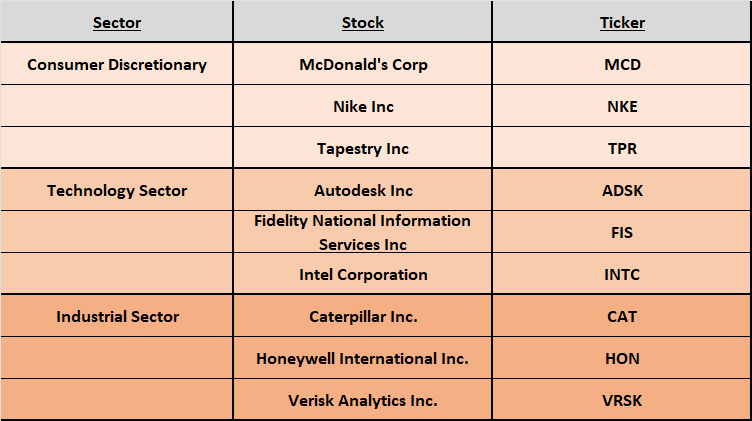

In [6]:
# Creating a ticker list for the stocks that we want to scrap
tickers_list = ['NKE', 'MCD', 'TPR', 'INTC', 'ADSK', 'FIS', 'CAT', 'HON', 'VRSK']

# Pulling historical stock price data (daily price) for each stock (from January 1st 2017 to December 31st 2021)
dow_prices = {ticker : si.get_data(ticker,start_date = '01/01/2017',end_date='12/31/2021',interval='1d') for ticker in tickers_list}

In [7]:
# Taking a look at the data extracted
dow_prices

{'NKE':                   open        high         low       close    adjclose  \
 2017-01-03   51.990002   52.500000   51.770000   51.980000   48.821365   
 2017-01-04   52.230000   53.349998   52.090000   53.070000   49.845131   
 2017-01-05   52.919998   53.099998   52.439999   53.060001   49.835732   
 2017-01-06   53.090000   54.090000   52.980000   53.910000   50.634079   
 2017-01-09   53.959999   53.990002   53.220001   53.380001   50.136292   
 ...                ...         ...         ...         ...         ...   
 2021-12-23  166.250000  167.160004  165.440002  165.669998  163.908966   
 2021-12-27  166.520004  167.690002  165.479996  167.580002  165.798645   
 2021-12-28  167.800003  168.250000  166.300003  166.419998  164.650986   
 2021-12-29  167.070007  169.800003  166.600006  168.779999  166.985901   
 2021-12-30  168.309998  170.119995  167.199997  167.490005  165.709610   
 
               volume ticker  
 2017-01-03  13295600    NKE  
 2017-01-04  13759500    NKE 

# **1) Data Preparation and EDA**

In [8]:
# Since we just need the Adjusted Closing Price for our analysis, we will extract 'adjclose' price from the data retrieved

# Creating an Empty DataFrame to store the data
prep_data = pd.DataFrame()

# Using all the Tickers to add data to the DataFrame created
for i in tickers_list[0:]:
  prep_data[i] = pd.DataFrame(dow_prices[i]['adjclose'])

In [9]:
# Printing the First 5 Rows of the DataFrame
prep_data.head()

NKE         MCD        TPR       INTC       ADSK        FIS  \
2017-01-03  48.821365  103.605545  30.218893  30.986683  76.180000  71.511086   
2017-01-04  49.845131  103.484306  30.840126  30.825823  77.519997  72.681564   
2017-01-05  49.835732  103.674828  30.031672  30.775032  76.930000  72.505051   
2017-01-06  50.634079  104.592926  30.244425  30.885084  79.300003  73.285400   
2017-01-09  50.136292  104.307114  29.776377  30.995157  79.589996  72.495773   

                  CAT         HON       VRSK  
2017-01-03  80.628777   98.629616  79.341415  
2017-01-04  80.268463   98.901276  79.965851  
2017-01-05  79.779495   99.122002  79.673134  
2017-01-06  79.813828  100.624603  80.375626  
2017-01-09  79.239067   99.792664  79.741447

In [10]:
# Printing the Shape of the DataFrame
prep_data.shape

(1258, 9)

### **Checking For Missing Values**

In [11]:
# Checking for Missing Values in the DataFrame
prep_data.isnull().sum()

NKE     0
MCD     0
TPR     0
INTC    0
ADSK    0
FIS     0
CAT     0
HON     0
VRSK    0
dtype: int64

**We can see that there are no Missing / Null values in the DataFrame. Hence, no entries have to be removed.**

### **Creating a DataFrame ('return_data') considering the Percentage Difference from the Previous Day as the Return**

In [12]:
# We will be using pct_change as the return

# Creating an Empty DataFrame to Store the Data
return_data = pd.DataFrame()

for i in tickers_list:
  return_data[i] = prep_data[i].pct_change()

In [13]:
# Printing the first 5 rows of the DataFrame
return_data.head()

NKE       MCD       TPR      INTC      ADSK       FIS  \
2017-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
2017-01-04  0.020970 -0.001170  0.020558 -0.005191  0.017590  0.016368   
2017-01-05 -0.000189  0.001841 -0.026214 -0.001648 -0.007611 -0.002429   
2017-01-06  0.016020  0.008856  0.007084  0.003576  0.030807  0.010763   
2017-01-09 -0.009831 -0.002733 -0.015476  0.003564  0.003657 -0.010775   

                 CAT       HON      VRSK  
2017-01-03       NaN       NaN       NaN  
2017-01-04 -0.004469  0.002754  0.007870  
2017-01-05 -0.006092  0.002232 -0.003661  
2017-01-06  0.000430  0.015159  0.008817  
2017-01-09 -0.007201 -0.008268 -0.007890

In [14]:
# Printing the Shape of the DataFrame
return_data.shape

(1258, 9)

In [15]:
# Dropping Records with NA values
return_data.dropna(inplace=True)

In [16]:
# Printing the Shape of the DataFrame
return_data.shape

(1257, 9)

### **Creating Separate DataFrames for the 3 Sectors**

In [17]:
df_consumer=prep_data[['NKE', 'MCD', 'TPR']] # Consumer Discretionary Sector

In [18]:
df_industrial=prep_data[['CAT', 'HON', 'VRSK']] # Industrial Sector

In [19]:
df_technology=prep_data[['INTC', 'ADSK', 'FIS']] # Technology Sector

### **Visualizing the Time Series**

#### **Consumer Discretionary Sector**


Time Series Plots for Consumer Discretionary Sector:



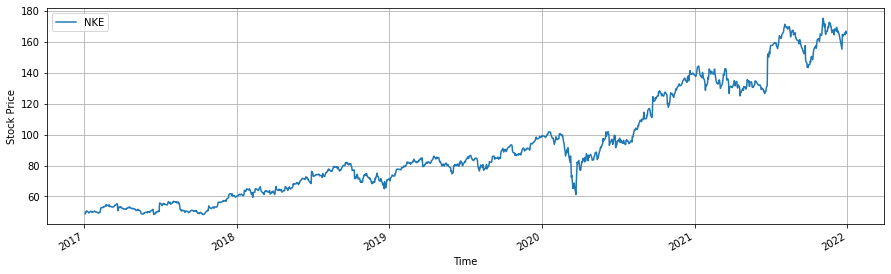

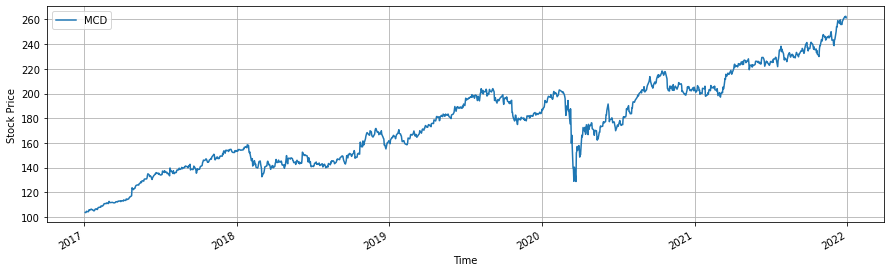

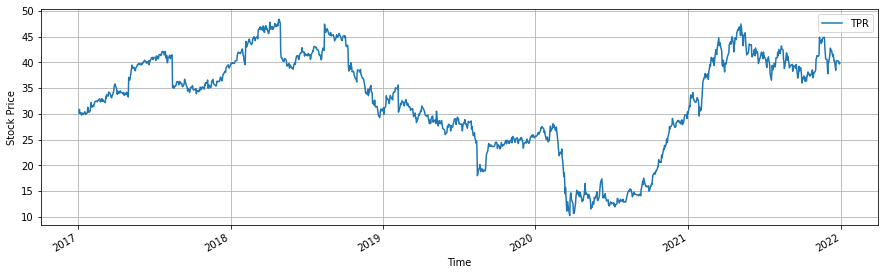

In [20]:
print("\nTime Series Plots for Consumer Discretionary Sector:\n")
for i in list(df_consumer.columns):
  df_consumer[i].plot(subplots=True,
        grid=True, 
        layout=(3,1),
         figsize=(15,15),ylabel='Stock Price',xlabel='Time',legend=i)
  plt.show()

* Under Consumer Discretionary Sector, for the Nike & McDonald's stocks , we see an overall upwards trend from 2017 to 2021. However, we see a huge dip in the stock prices for these two stocks in the first quarter of 2020 when Covid-19 affected the stock market adversely. Post first quarter of 2020, the stock prices showed an upward trend till 2021 during the recovery of the market from Covid-19.

* On the contrary for Tapestry Inc stocks, the overall trend is neither upward nor downwards.

#### **Industrial Sector**


 Time Series Plots for Industrial Sector:



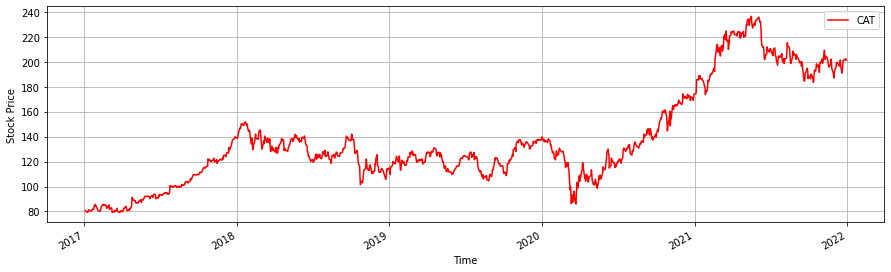

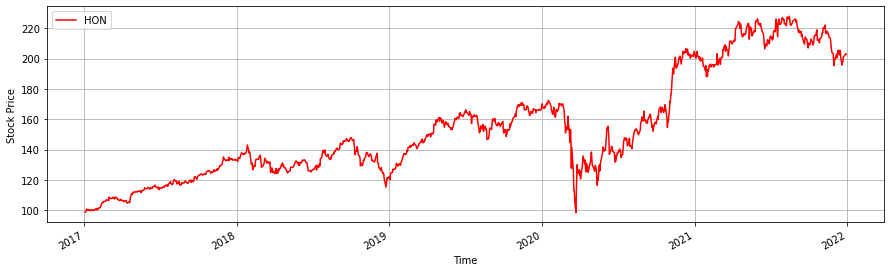

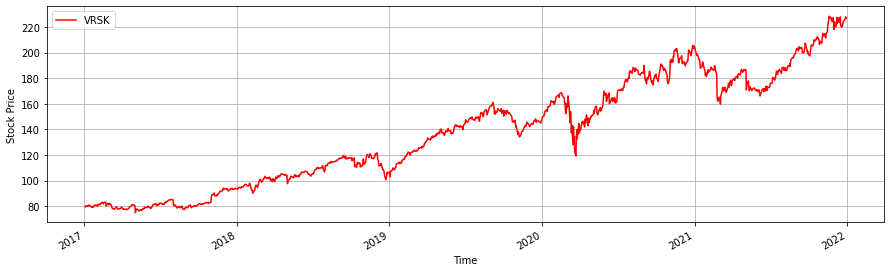

In [21]:
print("\n Time Series Plots for Industrial Sector:\n")
for i in list(df_industrial.columns):
  df_industrial[i].plot(subplots=True,
        grid=True, 
        layout=(3,1),
         figsize=(15,15),ylabel='Stock Price',xlabel='Time',legend=i,color='red')
  plt.show()

* For the Industrial Sector, we can see that for all the three stocks there is an overall upward trend from 2017 and 2021, with Verisk having the most increase from a value of 80 to 220+. Again, we can see a huge dip in the stock prices in the first quarter of 2020.

#### **Technology Sector**


 Time Series Plots for Technology Sector:



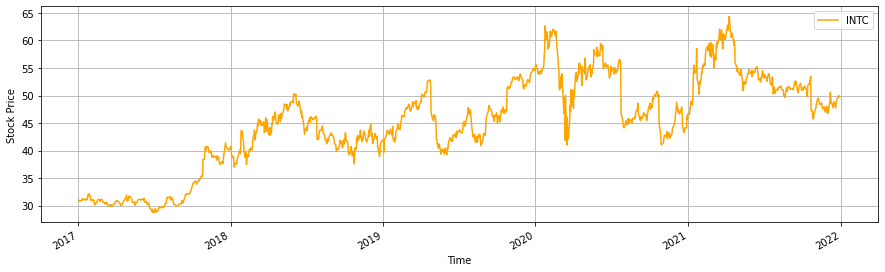

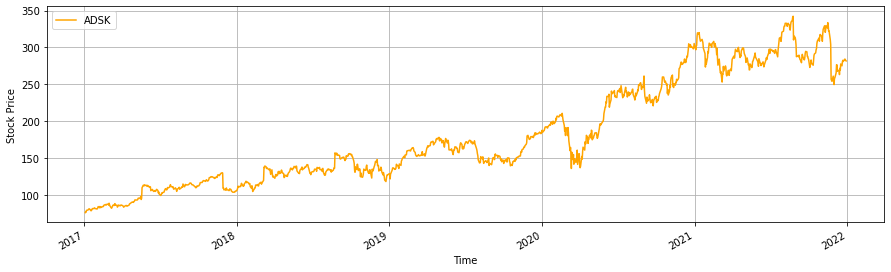

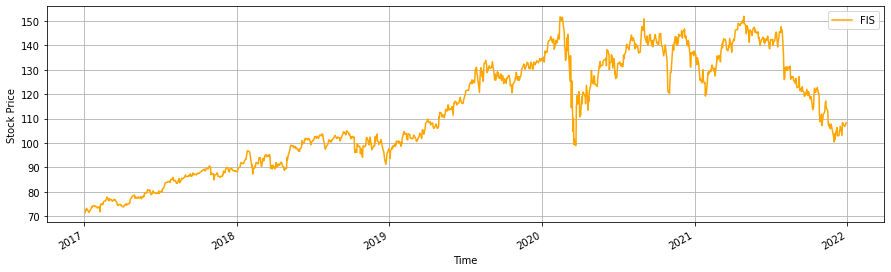

In [22]:
print("\n Time Series Plots for Technology Sector:\n")
for i in list(df_technology.columns):
  df_technology[i].plot(subplots=True,
        grid=True, 
        layout=(3,1),
         figsize=(15,15),ylabel='Stock Price',xlabel='Time',legend=i,color='orange')
  plt.show()

* For the Technology Sector, again all three stocks have an upward trend with a dip in stock prices in the first quarter of 2020. However, we can see that for Autodesk the dip in stock prices is comparatively smaller when compared to Intel & FIS stocks.

# **2) Optimization Model : Portfolio Allocation**

In [23]:
# Creating a Copy of 'return_data' DataFrame for Daily Returns
df=return_data.copy()

In [24]:
# Creating Separate DataFrames for Daily Returns for the 3 Sectors
df_consumer_ret=df[['NKE', 'MCD', 'TPR']] # Consumer Discretionary Sector
df_industrial_ret=df[['CAT', 'HON', 'VRSK']] # Industrial Sector
df_technology_ret=df[['INTC', 'ADSK', 'FIS']] # Technology Sector

### **Plotting Daily Returns for 3 Sectors**

* **Consumer Discretionary Sector**

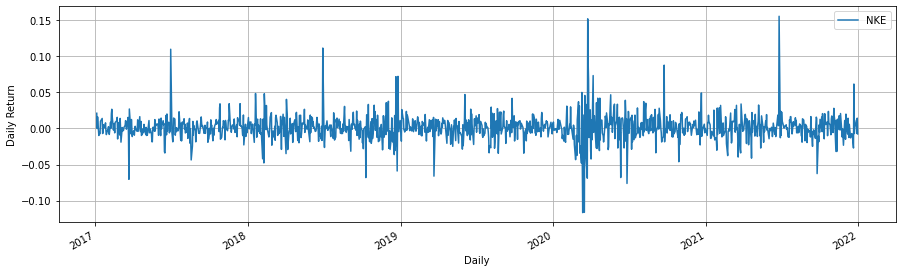

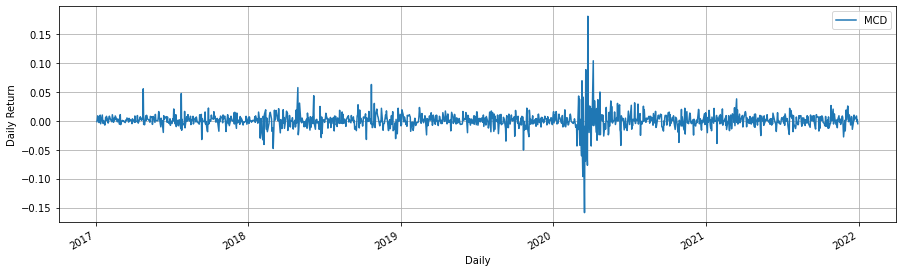

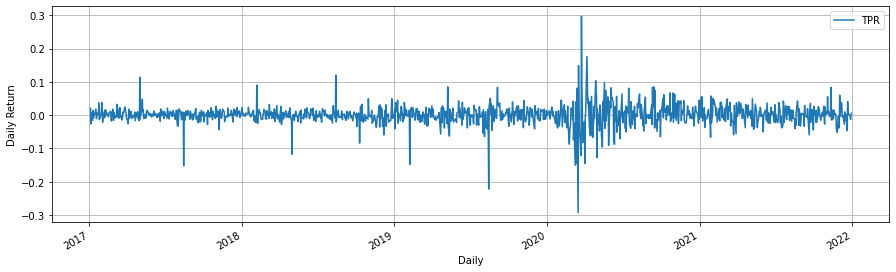

In [25]:
for i in list(df_consumer_ret.columns):
  df_consumer_ret[i].plot(subplots=True,
        grid=True, 
        layout=(3,1),
         figsize=(15,15),ylabel='Daily Return',xlabel='Daily',legend=i)
  plt.show()

* **Industrial Sector**

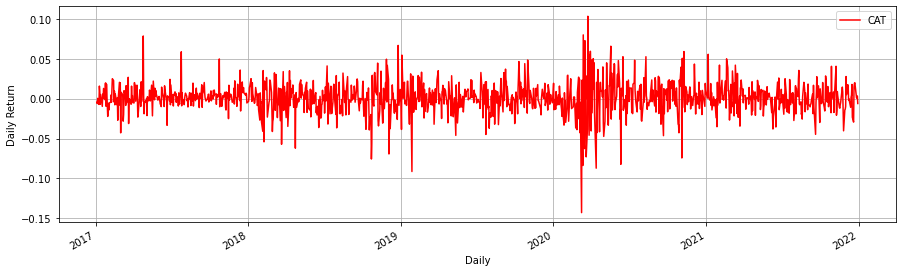

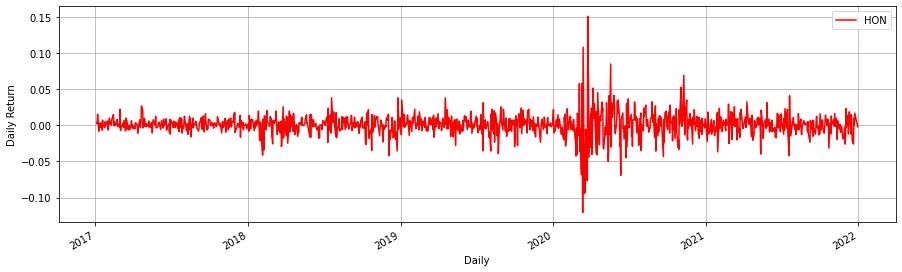

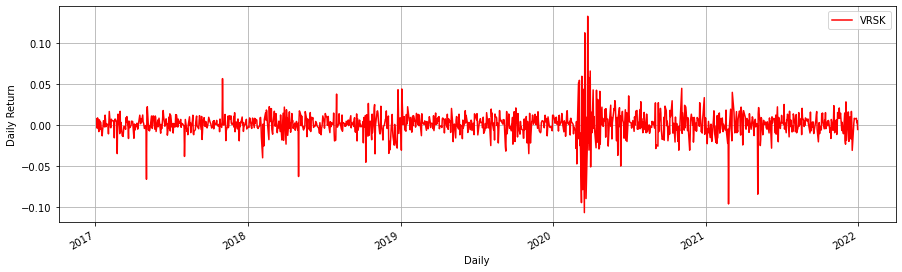

In [26]:
for i in list(df_industrial_ret.columns):
  df_industrial_ret[i].plot(subplots=True,
        grid=True, 
        layout=(3,1),
         figsize=(15,15),ylabel='Daily Return',xlabel='Daily',legend=i,color='red')
  plt.show()

* **Technology Sector**

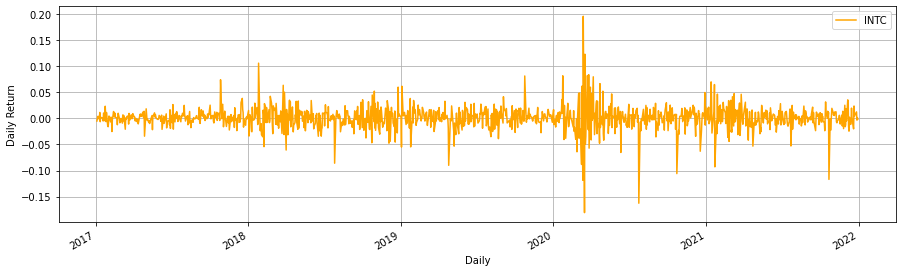

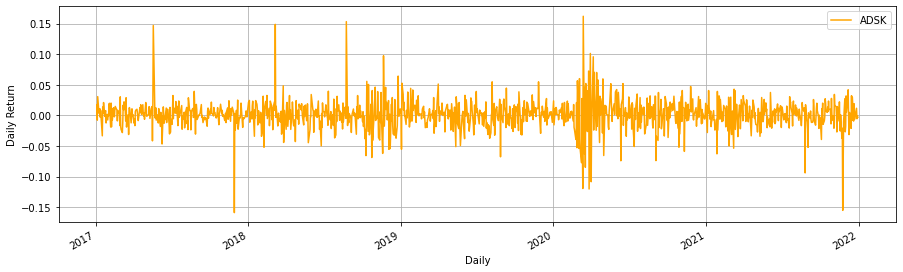

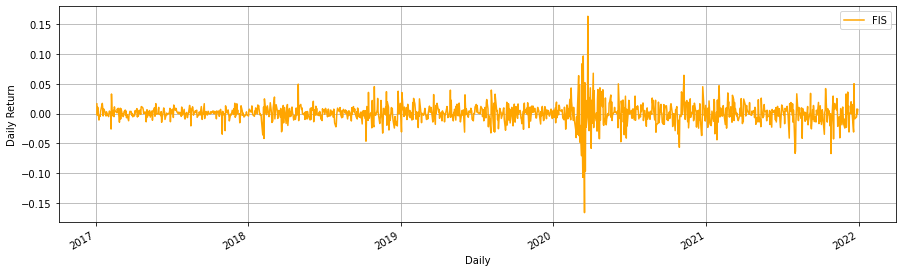

In [27]:
for i in list(df_technology_ret.columns):
  df_technology_ret[i].plot(subplots=True,
        grid=True, 
        layout=(3,1),
         figsize=(15,15),ylabel='Daily Return',xlabel='Daily',legend=i,color='orange')
  plt.show()

* For all the three sectors, we can see that the fluctuation intensity (fluctuation in stock prices) has increased in the first quarter of 2020, which is interesting as in our previous graphs, the stock values had went down during the same time.

#### **Average Value & Standard Deviation for Return for each of the Stocks**

In [28]:
# Average Value for Return for each of the Stocks
Avg_Return = pd.DataFrame(np.mean(df) ,columns=["Avg_Return"])
print("Average Value :\n")
print(Avg_Return)

print('\n\n')

# Standard Deviation for Return for each of the Stocks
Std_Dev_Return = pd.DataFrame(np.std(df) ,columns=["Std_Dev_Return"])
print("Standard Devation :\n")
print(Std_Dev_Return)

Average Value :

      Avg_Return
NKE     0.001140
MCD     0.000842
TPR     0.000702
INTC    0.000618
ADSK    0.001327
FIS     0.000477
CAT     0.000923
HON     0.000701
VRSK    0.000950



Standard Devation :

      Std_Dev_Return
NKE         0.018399
MCD         0.014543
TPR         0.030687
INTC        0.021849
ADSK        0.023871
FIS         0.017046
CAT         0.019661
HON         0.015917
VRSK        0.015047


### **Covariance Formula**

<center>

$\text{Cov}_{x,y}=\frac{\sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})}{N-1}$

</center>

* **Covariance Matrix**

In [29]:
# Creating Covariance Matrix from Stock Return DataFrame
df_cov = df.cov()
print('Covariance Matrix:')
df_cov

Covariance Matrix:


NKE       MCD       TPR      INTC      ADSK       FIS       CAT  \
NKE   0.000339  0.000127  0.000291  0.000153  0.000177  0.000153  0.000161   
MCD   0.000127  0.000212  0.000201  0.000118  0.000126  0.000144  0.000117   
TPR   0.000291  0.000201  0.000942  0.000239  0.000246  0.000214  0.000312   
INTC  0.000153  0.000118  0.000239  0.000478  0.000253  0.000188  0.000197   
ADSK  0.000177  0.000126  0.000246  0.000253  0.000570  0.000192  0.000208   
FIS   0.000153  0.000144  0.000214  0.000188  0.000192  0.000291  0.000156   
CAT   0.000161  0.000117  0.000312  0.000197  0.000208  0.000156  0.000387   
HON   0.000163  0.000135  0.000288  0.000172  0.000181  0.000164  0.000212   
VRSK  0.000136  0.000115  0.000165  0.000153  0.000168  0.000158  0.000125   

           HON      VRSK  
NKE   0.000163  0.000136  
MCD   0.000135  0.000115  
TPR   0.000288  0.000165  
INTC  0.000172  0.000153  
ADSK  0.000181  0.000168  
FIS   0.000164  0.000158  
CAT   0.000212  0.000125  
HON   0.000254  0.000128  
VRSK  0.000128  0.000227

* **Correlation Matrix**

In [30]:
# Printing the Correlation Matrix
Corr_matrix = df.corr()
print('Correlation Matrix:')
Corr_matrix

Correlation Matrix:


NKE       MCD       TPR      INTC      ADSK       FIS       CAT  \
NKE   1.000000  0.473295  0.514590  0.379578  0.401673  0.486761  0.444054   
MCD   0.473295  1.000000  0.449168  0.370450  0.363419  0.579407  0.410327   
TPR   0.514590  0.449168  1.000000  0.356730  0.336114  0.408039  0.516811   
INTC  0.379578  0.370450  0.356730  1.000000  0.483923  0.503137  0.457693   
ADSK  0.401673  0.363419  0.336114  0.483923  1.000000  0.472068  0.442701   
FIS   0.486761  0.579407  0.408039  0.503137  0.472068  1.000000  0.463969   
CAT   0.444054  0.410327  0.516811  0.457693  0.442701  0.463969  1.000000   
HON   0.557358  0.581445  0.589566  0.493904  0.474829  0.603998  0.677798   
VRSK  0.489795  0.527303  0.356309  0.463940  0.466829  0.614580  0.420797   

           HON      VRSK  
NKE   0.557358  0.489795  
MCD   0.581445  0.527303  
TPR   0.589566  0.356309  
INTC  0.493904  0.463940  
ADSK  0.474829  0.466829  
FIS   0.603998  0.614580  
CAT   0.677798  0.420797  
HON   1.000000  0.535026  
VRSK  0.535026  1.000000

In [31]:
# Creating a DataFrame to store the Average Value of Return for each of the stocks
# These are the Coefficients for the Objective Function
df_return = df.mean()
print('Average Return:\n')
print(df_return)

Average Return:

NKE     0.001140
MCD     0.000842
TPR     0.000702
INTC    0.000618
ADSK    0.001327
FIS     0.000477
CAT     0.000923
HON     0.000701
VRSK    0.000950
dtype: float64


### **Defining the Model**

In [32]:
# Defining the Model
m=ConcreteModel()

### **Declaring Decision Variables**

In [33]:
# Each Decision Variable Represents a Stock
m.NKE = Var(within=NonNegativeReals, bounds=(0,1))
m.MCD = Var(within=NonNegativeReals, bounds=(0,1))
m.TPR = Var(within=NonNegativeReals, bounds=(0,1))
m.INTC = Var(within=NonNegativeReals, bounds=(0,1))
m.ADSK = Var(within=NonNegativeReals, bounds=(0,1))
m.FIS = Var(within=NonNegativeReals, bounds=(0,1))
m.CAT = Var(within=NonNegativeReals, bounds=(0,1))
m.HON = Var(within=NonNegativeReals, bounds=(0,1))
m.VRSK = Var(within=NonNegativeReals, bounds=(0,1))

### **Declaring Binary Decision Variables**

In [34]:
# Binary Variables for Stock Selection
# Binary Variables take values of 0 or 1

m.b1=Var(domain=Binary)
m.b2=Var(domain=Binary)
m.b3=Var(domain=Binary)
m.b4=Var(domain=Binary)
m.b5=Var(domain=Binary)
m.b6=Var(domain=Binary)
m.b7=Var(domain=Binary)
m.b8=Var(domain=Binary)
m.b9=Var(domain=Binary)

### **Definining the Objective Function**

In [35]:
# Definining the Objective Function
m.objective = Objective(expr =               
                        m.b1*m.NKE*df_return[0] + 
                        m.b2*m.MCD*df_return[1] + 
                        m.b3*m.TPR*df_return[2] +
                        m.b4*m.INTC*df_return[3] + 
                        m.b5*m.ADSK*df_return[4]+
                        m.b6*m.FIS*df_return[5]+
                        m.b7*m.CAT*df_return[6]+
                        m.b8*m.HON*df_return[7]+
                        m.b9*m.VRSK*df_return[8],
                        sense=maximize) # We want to maximize the Return

### **Defining the Constraints**

In [36]:
# 1. First Constraint : Sum of Proportions of the stocks = 1
m.sum_proportions = Constraint(expr = m.NKE + m.MCD + m.TPR + m.INTC + m.ADSK +m.FIS + m.CAT +m.HON + m.VRSK == 1)

# 2. Second Constraint : Minimum Return Should be at least 0.0005 or 0.05%
m.return_floor = Constraint(expr = m.objective >= 0.0005)

# 3. Third Constraint : We set the Minimum Risk here
# We are just initializing the constraint
m.total_risk = Constraint(expr = m.NKE + m.MCD + m.TPR + m.INTC + m.ADSK + m.FIS + m.CAT + m.HON + m.VRSK >= 0.0)

### **Defining Binary Constraints**

In [37]:
# Binary Constraints to ensure that only one stock is selected from the Consumer Discretionary Sector
m.binary_constraint_1=Constraint(expr=m.b1+m.b2+m.b3 <=1)
m.binary_constraint_4=Constraint(expr=m.b1+m.b2+m.b3 >=1)

# Binary Constraints to ensure that only one stock is selected from the Technology Sector
m.binary_constraint_2=Constraint(expr=m.b4+m.b5+m.b6 <=1)
m.binary_constraint_5=Constraint(expr=m.b4+m.b5+m.b6 >=1)

# Binary Constraints to ensure that only one stock is selected from the Industrial Sector
m.binary_constraint_3=Constraint(expr=m.b7+m.b8+m.b9 <=1)
m.binary_constraint_6=Constraint(expr=m.b7+m.b8+m.b9 >=1)

### **Creating Tables for Calculating the Risk**

In [38]:
# Calculating Risks
def calc_risk(m):
  variables = m.NKE, m.MCD, m.TPR, m.INTC ,m.ADSK ,m.FIS, m.CAT, m.HON,m.VRSK
  tickers=['NKE', 'MCD', 'TPR', 'INTC', 'ADSK', 'FIS', 'CAT', 'HON', 'VRSK']
  risk_exp = 0
  for i in range(len(variables)):
    for j in range(len(variables)):
      risk_exp += variables[i]*df_cov.at[tickers[i],tickers[j]]*variables[j]
  return risk_exp

# Computing the Risk
expr_risk = calc_risk(m)

### **Assigning Max Risk & Risk Ceilings**

In [39]:
# Max risk should be less than 0.0007
max_risk=0.0007

# Sequence of Risk Limits
risk_limits = np.arange(0.00001,max_risk, 0.000005) 
print("Risk Ceilings:")
print(risk_limits)
print("\n")

Risk Ceilings:
[1.00e-05 1.50e-05 2.00e-05 2.50e-05 3.00e-05 3.50e-05 4.00e-05 4.50e-05
 5.00e-05 5.50e-05 6.00e-05 6.50e-05 7.00e-05 7.50e-05 8.00e-05 8.50e-05
 9.00e-05 9.50e-05 1.00e-04 1.05e-04 1.10e-04 1.15e-04 1.20e-04 1.25e-04
 1.30e-04 1.35e-04 1.40e-04 1.45e-04 1.50e-04 1.55e-04 1.60e-04 1.65e-04
 1.70e-04 1.75e-04 1.80e-04 1.85e-04 1.90e-04 1.95e-04 2.00e-04 2.05e-04
 2.10e-04 2.15e-04 2.20e-04 2.25e-04 2.30e-04 2.35e-04 2.40e-04 2.45e-04
 2.50e-04 2.55e-04 2.60e-04 2.65e-04 2.70e-04 2.75e-04 2.80e-04 2.85e-04
 2.90e-04 2.95e-04 3.00e-04 3.05e-04 3.10e-04 3.15e-04 3.20e-04 3.25e-04
 3.30e-04 3.35e-04 3.40e-04 3.45e-04 3.50e-04 3.55e-04 3.60e-04 3.65e-04
 3.70e-04 3.75e-04 3.80e-04 3.85e-04 3.90e-04 3.95e-04 4.00e-04 4.05e-04
 4.10e-04 4.15e-04 4.20e-04 4.25e-04 4.30e-04 4.35e-04 4.40e-04 4.45e-04
 4.50e-04 4.55e-04 4.60e-04 4.65e-04 4.70e-04 4.75e-04 4.80e-04 4.85e-04
 4.90e-04 4.95e-04 5.00e-04 5.05e-04 5.10e-04 5.15e-04 5.20e-04 5.25e-04
 5.30e-04 5.35e-04 5.40e-04 5.45e-04

In [40]:
print("Number of Risk Ceilings:")
print(len(risk_limits))

Number of Risk Ceilings:
138


### **Solving**

In [41]:
# Importing pyomo Modules
from pyomo.opt import SolverStatus, TerminationCondition

# Updating Risk Constraints for each limit and then solving the problems
param_analysis = {} # key=risk, value =stock allocations 
returns = {} # key=risk, value = return
for r in risk_limits:
  # Removing Constraints to Avoid Error Messages
  m.del_component(m.total_risk)
  m.total_risk = Constraint(expr = expr_risk <= r)
  # Running Solver
  result = SolverFactory('bonmin', executable='/content/bonmin').solve(m)

  # If solution is not feasible, we ignore this run
  if result.solver.termination_condition == TerminationCondition.infeasible:
    continue

  result = result.write()

  # Storing our Allocation Proportions
  param_analysis[r] = [m.NKE() , m.MCD() , m.TPR() , m.INTC() , m.ADSK() , m.FIS() , m.CAT() , m.HON() , m.VRSK()]
  # Storing our Returns
  returns[r]=m.NKE()*df_return[0] + m.MCD()*df_return[1] +  m.TPR()*df_return[2] + m.INTC()*df_return[3] + m.ADSK()*df_return[4]+ m.FIS()*df_return[5]+ m.CAT()*df_return[6]+m.HON()*df_return[7]+ m.VRSK()*df_return[8]


  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
  - termination condition: infeasible
  - message from solver: bonmin\

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.12658309936523438
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ==========================

In [42]:
# Printing the Return (Objective Function)
print(m.objective())

0.001326574499515107


### **Generating DataFrame for Proportions of the Portfolio for each risk limit**

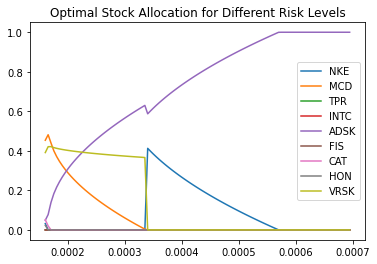

In [43]:
# Generating DataFrame for Proportions of the Portfolio for each risk limit
param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index')
param_analysis.columns = ['NKE', 'MCD', 'TPR', 'INTC', 'ADSK', 'FIS', 'CAT', 'HON', 'VRSK']
param_analysis.plot(figsize=(6,4))
plt.title('Optimal Stock Allocation for Different Risk Levels')
plt.show()

* Towards the lefthand side, we have lower risk and higher diversity.

* Towards the righthand side, we have higher risk and lower diversity.

* We have the optimal allocation of stocks corresponding to each risk level. 

* For our analysis, we would be considering the risk value of 0.000205 and the corresponding stocks chosen are McDonald's, Autodesk and Verisk. This risk value has been chosen as these 3 stocks belong to 3 different sectors and their allocation proportion sums to 1 approximately.

* **We can see that the 3 stocks chosen by the MPT model are McDonald's, Autodesk & Verisk.**

In [44]:
# Printing the first 5 rows of the DataFrame
# Here Index represents the Risk Level
param_analysis.head()

NKE       MCD       TPR          INTC      ADSK  \
0.000160  3.203346e-02  0.453527  0.000000  9.740182e-08  0.048609   
0.000165  3.138064e-05  0.481441  0.000001  5.099717e-06  0.077568   
0.000170  8.229534e-09  0.439885  0.000000  4.449302e-09  0.138742   
0.000175  3.861908e-09  0.400311  0.000000  1.820160e-09  0.183305   
0.000180  2.989998e-09  0.370928  0.000000  1.311477e-09  0.216391   

                   FIS           CAT           HON      VRSK  
0.000160  1.014731e-08  5.139873e-02  2.319089e-02  0.391241  
0.000165  2.856521e-06  2.000616e-02  1.412627e-05  0.420931  
0.000170  2.973413e-09  1.055334e-08  7.876132e-09  0.421373  
0.000175  1.648026e-09  4.311288e-09  3.745004e-09  0.416385  
0.000180  1.393738e-09  3.133848e-09  2.917707e-09  0.412681

In [45]:
# Subsetting (Creating Lists for Risks & Returns using the Dictionary 'returns')
risk = list(returns.keys()) # coercing dict_keys to a list
print("Risk:")
print(risk)
reward = list(returns.values()) # coercing dict_values to a list
print("Reward:")
print(reward) 

Risk:
[0.00016000000000000004, 0.00016500000000000003, 0.00017000000000000004, 0.00017500000000000005, 0.00018000000000000004, 0.00018500000000000005, 0.00019000000000000004, 0.00019500000000000005, 0.00020000000000000004, 0.00020500000000000005, 0.00021000000000000004, 0.00021500000000000005, 0.00022000000000000006, 0.00022500000000000005, 0.00023000000000000006, 0.00023500000000000005, 0.00024000000000000006, 0.00024500000000000005, 0.00025000000000000006, 0.00025500000000000007, 0.0002600000000000001, 0.0002650000000000001, 0.0002700000000000001, 0.00027500000000000007, 0.0002800000000000001, 0.0002850000000000001, 0.0002900000000000001, 0.0002950000000000001, 0.0003000000000000001, 0.0003050000000000001, 0.0003100000000000001, 0.0003150000000000001, 0.0003200000000000001, 0.0003250000000000001, 0.0003300000000000001, 0.0003350000000000001, 0.00034000000000000013, 0.0003450000000000001, 0.0003500000000000001, 0.0003550000000000001, 0.00036000000000000013, 0.0003650000000000001, 0.00

### **Plotting the Efficient Frontier**

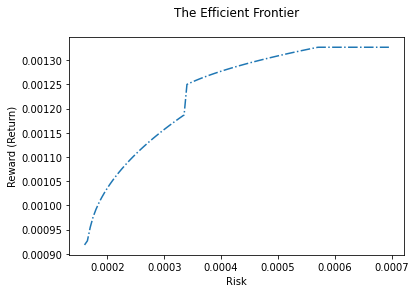

In [46]:
# Efficient Frontier
plot(risk, reward, '-.')
title('The Efficient Frontier\n')
xlabel('Risk')
ylabel('Reward (Return)')
plt.show()

* We have plotted the efficient frontier, that is, risk (X) vs. return (Y).

* At a certain point, taking on more risk doesn't increase your returns! This occurs at ~Risk = 0.006 which achieves a max return around 0.135% (0.00135). 

* Any point on the efficient frontier represents an optimal allocation based on your risk tolerance.

In [47]:
# Creating a DataFrame for Risk
risk = pd.DataFrame(risk)
# Creating a DataFrame for Reward
reward = pd.DataFrame(reward)
reward['risk'] = risk
reward.rename({0:'reward'}, axis=1, inplace=True)
reward['Diff'] = reward['reward'].diff()
reward['percDiff'] = reward['reward'].pct_change()
reward.head() # Printing first 5 rows

reward      risk      Diff  percDiff
0  0.000918  0.000160       NaN       NaN
1  0.000927  0.000165  0.000008  0.009173
2  0.000955  0.000170  0.000028  0.030296
3  0.000976  0.000175  0.000021  0.022057
4  0.000991  0.000180  0.000016  0.016023

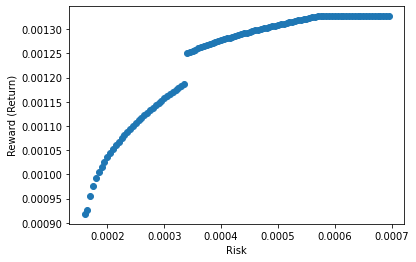

In [48]:
# Creating a Scatterplot for Reward (Return) vs Risk
plt.scatter(x=reward['risk'], y=reward['reward'])
xlabel('Risk')
ylabel('Reward (Return)')
plt.show()

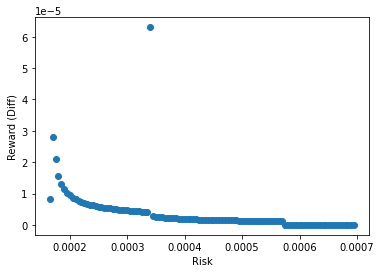

In [49]:
# Creating a Scatterplot for Reward (Diff) vs Risk
plt.scatter(x=reward['risk'], y=reward['Diff'])
xlabel('Risk')
ylabel('Reward (Diff)')
plt.show()

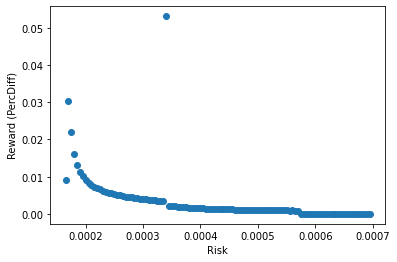

In [50]:
# Creating a Scatterplot for Reward (PercDiff) vs Risk
plt.scatter(x=reward['risk'], y=reward['percDiff'])
xlabel('Risk')
ylabel('Reward (PercDiff)')
plt.show()

### **Selecting Portfolio Allocation from MPT Model**

 **From the MPT model, we have selected a portfolio allocation containing exactly 3 stocks (one from each sector) corresponding to a risk of 0.000205.**

In [51]:
# For the DataFrame 'param_analysis', the index represents the risk
# We have chosen an allocation corresponding to a risk of 0.000205
chosen_allocation=param_analysis[(param_analysis.index >0.000201) & (param_analysis.index <0.00021)]

In [52]:
# Printing Chosen Allocation
chosen_allocation

NKE       MCD  TPR          INTC      ADSK           FIS  \
0.000205  1.805872e-09  0.271685  0.0  5.701654e-10  0.328144  9.905489e-10   

                   CAT           HON      VRSK  
0.000205  1.652043e-09  1.783044e-09  0.400171

In [53]:
# Printing Chosen Allocation for the Top 3 Stocks
chosen_allocation=chosen_allocation[['MCD','ADSK','VRSK']]
chosen_allocation

MCD      ADSK      VRSK
0.000205  0.271685  0.328144  0.400171

In [54]:
# Stocks Chosen from MPT Model
# Here '1' represents that the Stock was Chosen & '0' means that the Stock was not Chosen

print("Nike :",m.b1())
print("McDonald's:",m.b2())
print("Tapestry Inc. :",m.b3())
print("Intel :",m.b4())
print("Autodesk :",m.b5())
print("FIS :",m.b6())
print("Caterpillar :",m.b7())
print("Honeywell :",m.b8())
print("Verisk :",m.b9())

Nike : 0.0
McDonald's: 1.0
Tapestry Inc. : 0.0
Intel : 0.0
Autodesk : 1.0
FIS : 0.0
Caterpillar : 0.0
Honeywell : 0.0
Verisk : 1.0


**From the Selected Portfolio Allocation, we can see that we have allocated 0.272% of the Portfolio to McDonald's Stock , 0.328% of the Portfolio to Autodesk Stock, and 0.40% of the Portfolio to Verisk Stock.**

# **3) Momentum Trading**

In [55]:
# Creating a new DataFrame based on the stocks chosen from MPT Model for Momentum Trading
final_data=prep_data[['MCD','ADSK','VRSK']]

In [56]:
Mcd_data=final_data[['MCD']] # DataFrame for McDonald's
Autodesk_data=final_data[['ADSK']] # DataFrame for Autodesk
Verisk_data=final_data[['VRSK']] # DataFrame for Verisk

### **9-Day / 21-Day Moving Average Strategy**

In [57]:
# We use shift() to prevent data leakage
Mcd_data['9-day'] = Mcd_data['MCD'].rolling(9).mean().shift() # 9-Day Moving Average 
Mcd_data['21-day'] = Mcd_data['MCD'].rolling(21).mean().shift() # 21-Day Moving Average

<ipython-input-57-3eb4b1e97c9f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Mcd_data['9-day'] = Mcd_data['MCD'].rolling(9).mean().shift() # 9-Day Moving Average


In [58]:
# We use shift() to prevent data leakage
Autodesk_data['9-day'] = Autodesk_data['ADSK'].rolling(9).mean().shift() # 9-Day Moving Average 
Autodesk_data['21-day'] = Autodesk_data['ADSK'].rolling(21).mean().shift() # 21-Day Moving Average

<ipython-input-58-ece8a1a9b36f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Autodesk_data['9-day'] = Autodesk_data['ADSK'].rolling(9).mean().shift() # 9-Day Moving Average


In [59]:
# We use shift() to prevent data leakage
Verisk_data['9-day'] = Verisk_data['VRSK'].rolling(9).mean().shift() # 9-Day Moving Average
Verisk_data['21-day'] = Verisk_data['VRSK'].rolling(21).mean().shift() # 21-Day Moving Average

<ipython-input-59-b8372eb3f6e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Verisk_data['9-day'] = Verisk_data['VRSK'].rolling(9).mean().shift() # 9-Day Moving Average


* **McDonald's**

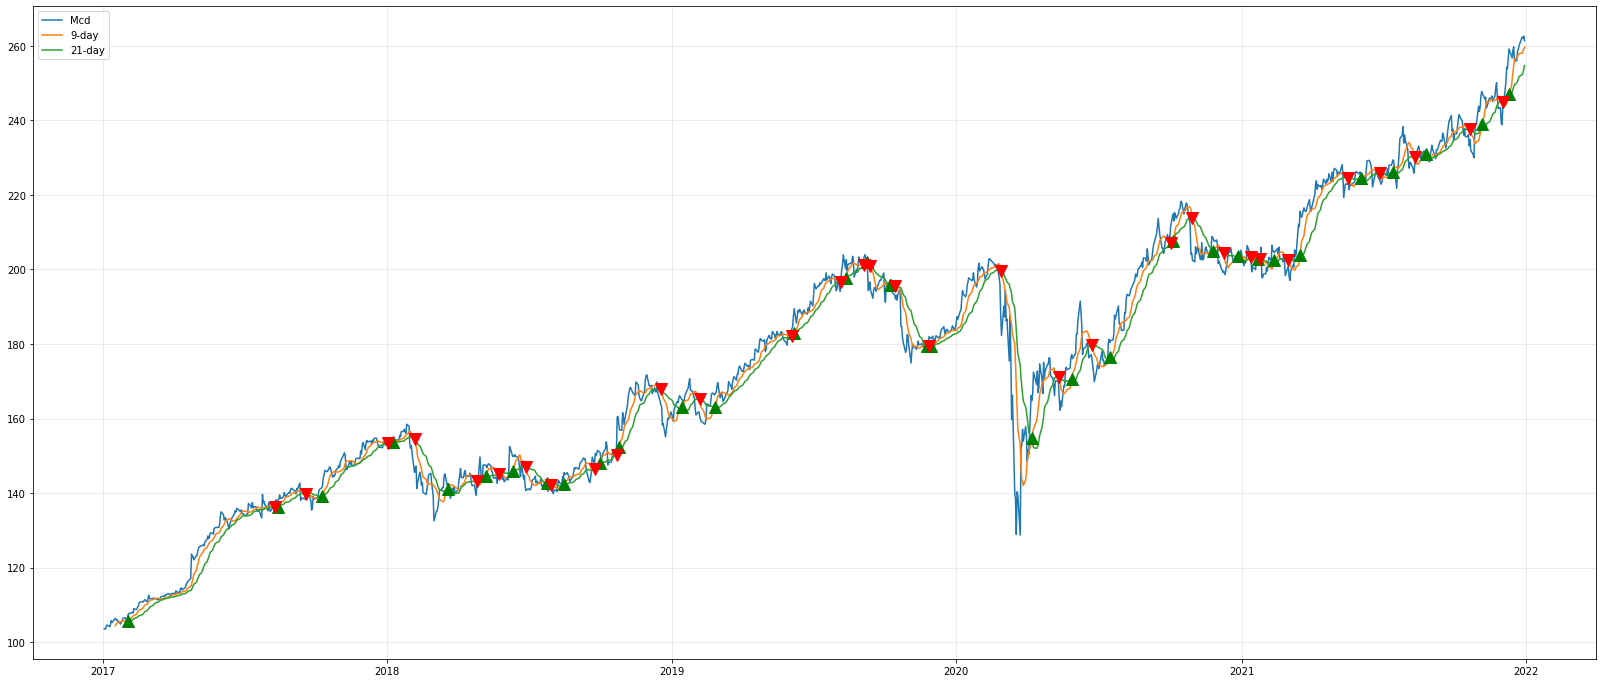

In [60]:
Mcd_data['invested_1'] = np.where(Mcd_data['9-day'] > Mcd_data['21-day'], 1, 0) # Here invested = 1 if 9-day average is greater than 21-day average
Mcd_data['signal_1'] = Mcd_data['invested_1'].diff() # 'signal' tells when you should buy and sell (+1 means buy, -1 means sell, 0 means hold)
Mcd_data['logClose_1'] = np.log(Mcd_data['MCD']) 
Mcd_data['return_1'] = Mcd_data['logClose_1'].diff() 
Mcd_data['system_return_1'] = Mcd_data['invested_1'] * Mcd_data['return_1'] # 'system_return' tells how much money you would have made
plt.rcParams['figure.figsize'] = 28, 12
plt.grid(True, alpha = .3)
plt.plot(Mcd_data['MCD'], label = 'Mcd') # Actual Value
plt.plot(Mcd_data['9-day'], label = '9-day') # 9-day Average
plt.plot(Mcd_data['21-day'], label = '21-day') # 21-day Average
plt.plot(Mcd_data.loc[Mcd_data.signal_1 == 1].index, Mcd_data['9-day'][Mcd_data.signal_1 == 1], '^',
         color = 'g', markersize = 12)
plt.plot(Mcd_data.loc[Mcd_data.signal_1 == -1].index, Mcd_data['21-day'][Mcd_data.signal_1 == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2) 

* **Autodesk**

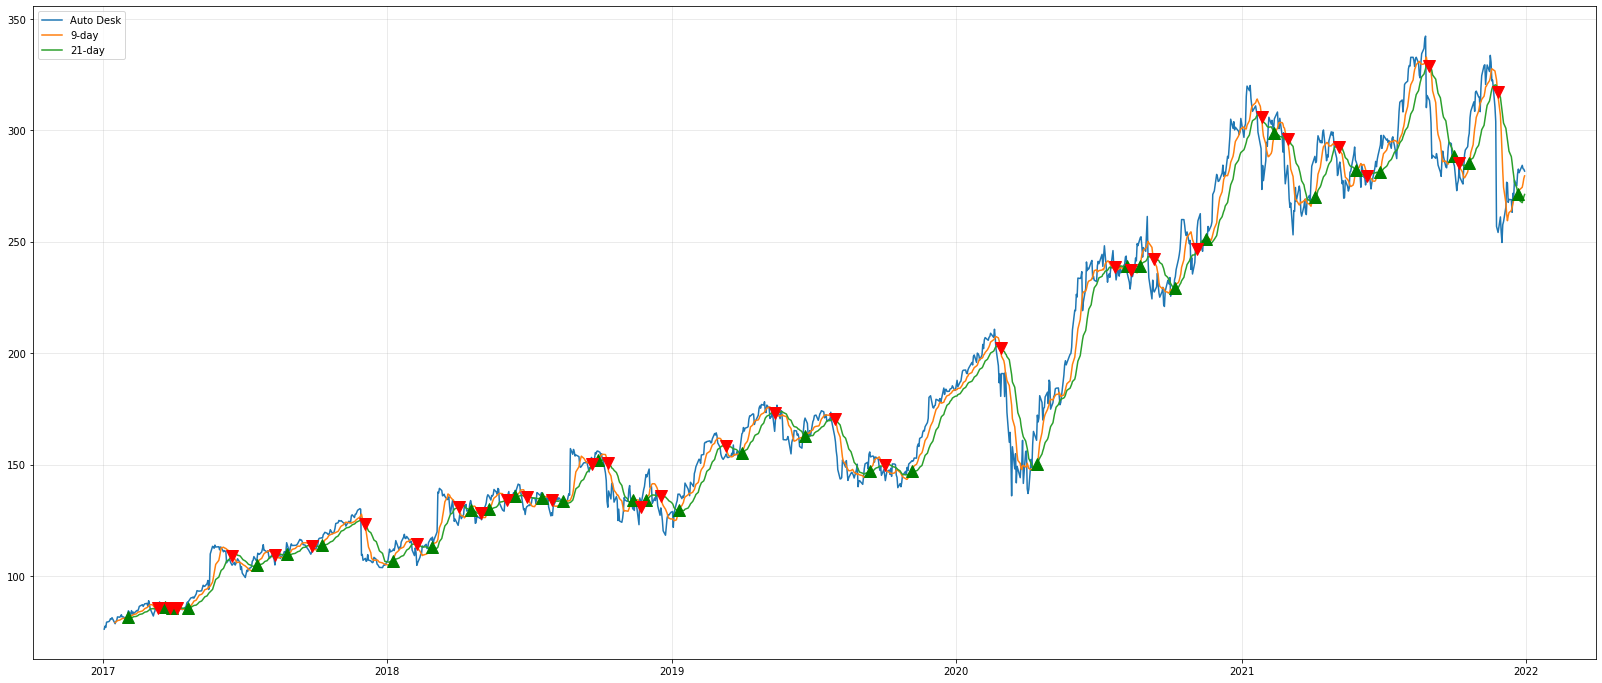

In [61]:
Autodesk_data['invested_1'] = np.where(Autodesk_data['9-day'] > Autodesk_data['21-day'], 1, 0) # Here invested = 1 if 9-day average is greater than 21-day average
Autodesk_data['signal_1'] = Autodesk_data['invested_1'].diff() # 'signal' tells when you should buy and sell (+1 means buy, -1 means sell, 0 means hold)
Autodesk_data['logClose_1'] = np.log(Autodesk_data['ADSK']) 
Autodesk_data['return_1'] = Autodesk_data['logClose_1'].diff() 
Autodesk_data['system_return_1'] = Autodesk_data['invested_1'] * Autodesk_data['return_1'] # 'system_return' tells how much money you would have made
plt.rcParams['figure.figsize'] = 28, 12
plt.grid(True, alpha = .3)
plt.plot(Autodesk_data['ADSK'], label = 'Auto Desk') # Actual Value
plt.plot(Autodesk_data['9-day'], label = '9-day') # 9-day Average
plt.plot(Autodesk_data['21-day'], label = '21-day') # 21-day Average
plt.plot(Autodesk_data.loc[Autodesk_data.signal_1 == 1].index, Autodesk_data['9-day'][Autodesk_data.signal_1 == 1], '^',
         color = 'g', markersize = 12)
plt.plot(Autodesk_data.loc[Autodesk_data.signal_1 == -1].index, Autodesk_data['21-day'][Autodesk_data.signal_1 == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2)

* **Verisk**

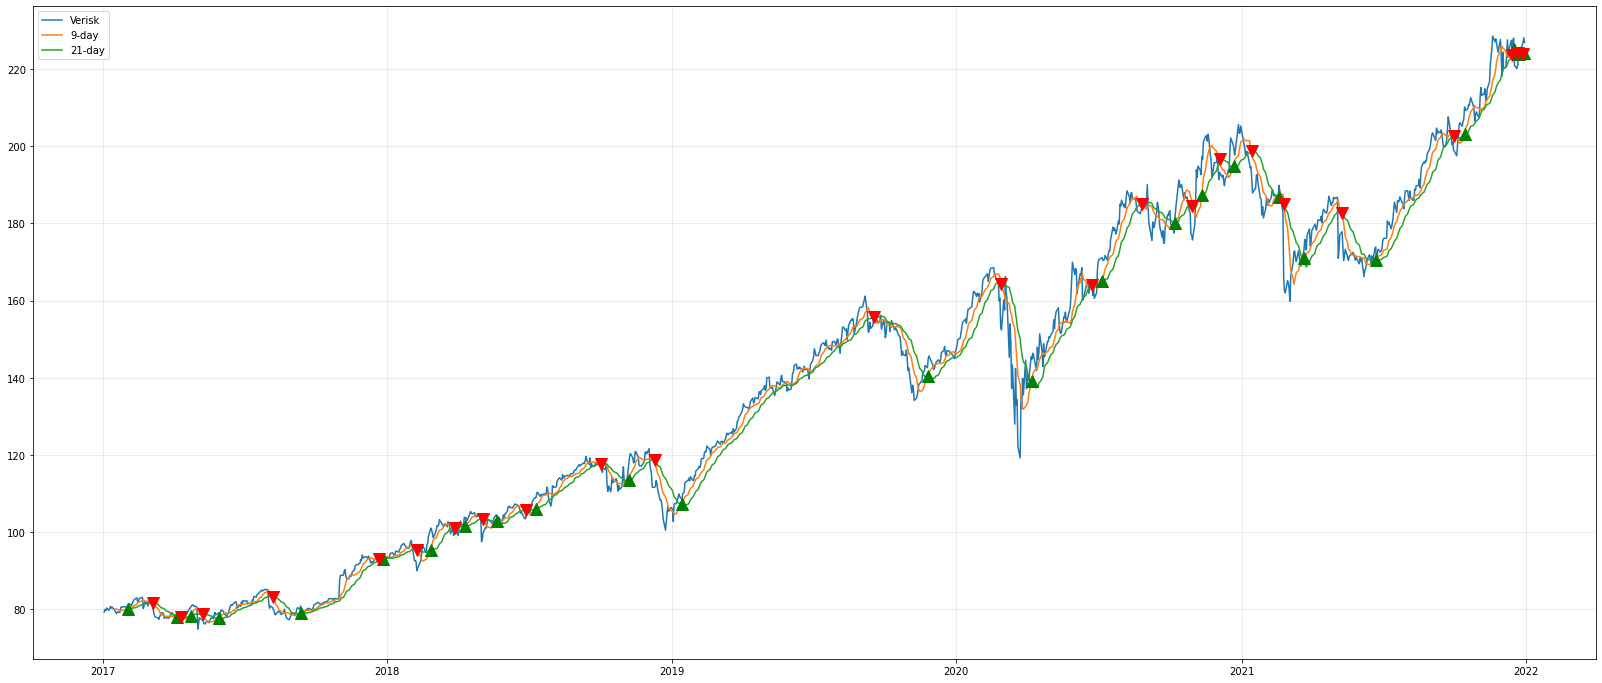

In [62]:
Verisk_data['invested_1'] = np.where(Verisk_data['9-day'] > Verisk_data['21-day'], 1, 0) # Here invested = 1 if 9-day average is greater than 21-day average
Verisk_data['signal_1'] = Verisk_data['invested_1'].diff() # 'signal' tells when you should buy and sell (+1 means buy, -1 means sell, 0 means hold)
Verisk_data['logClose_1'] = np.log(Verisk_data['VRSK']) 
Verisk_data['return_1'] = Verisk_data['logClose_1'].diff() 
Verisk_data['system_return_1'] = Verisk_data['invested_1'] * Verisk_data['return_1'] # 'system_return' tells how much money you would have made
plt.rcParams['figure.figsize'] = 28, 12
plt.grid(True, alpha = .3)
plt.plot(Verisk_data['VRSK'], label = 'Verisk') # Actual Value
plt.plot(Verisk_data['9-day'], label = '9-day') # 9-day Average
plt.plot(Verisk_data['21-day'], label = '21-day') # 21-day Average
plt.plot(Verisk_data.loc[Verisk_data.signal_1 == 1].index, Verisk_data['9-day'][Verisk_data.signal_1 == 1], '^',
         color = 'g', markersize = 12)
plt.plot(Verisk_data.loc[Verisk_data.signal_1 == -1].index, Verisk_data['21-day'][Verisk_data.signal_1 == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2)

### **5-Day / 13-Day Moving Average Strategy**

In [63]:
# We use shift() to prevent data leakage
Mcd_data['5-day'] = Mcd_data['MCD'].rolling(5).mean().shift() # 5-Day Moving Average
Mcd_data['13-day'] = Mcd_data['MCD'].rolling(13).mean().shift() # 13-Day Moving Average

In [64]:
# We use shift() to prevent data leakage
Autodesk_data['5-day'] = Autodesk_data['ADSK'].rolling(5).mean().shift() # 5-Day Moving Average
Autodesk_data['13-day'] = Autodesk_data['ADSK'].rolling(13).mean().shift() # 13-Day Moving Average

In [65]:
# We use shift() to prevent data leakage
Verisk_data['5-day'] = Verisk_data['VRSK'].rolling(5).mean().shift() # 5-Day Moving Average
Verisk_data['13-day'] = Verisk_data['VRSK'].rolling(13).mean().shift() # 13-Day Moving Average

* **McDonald's**

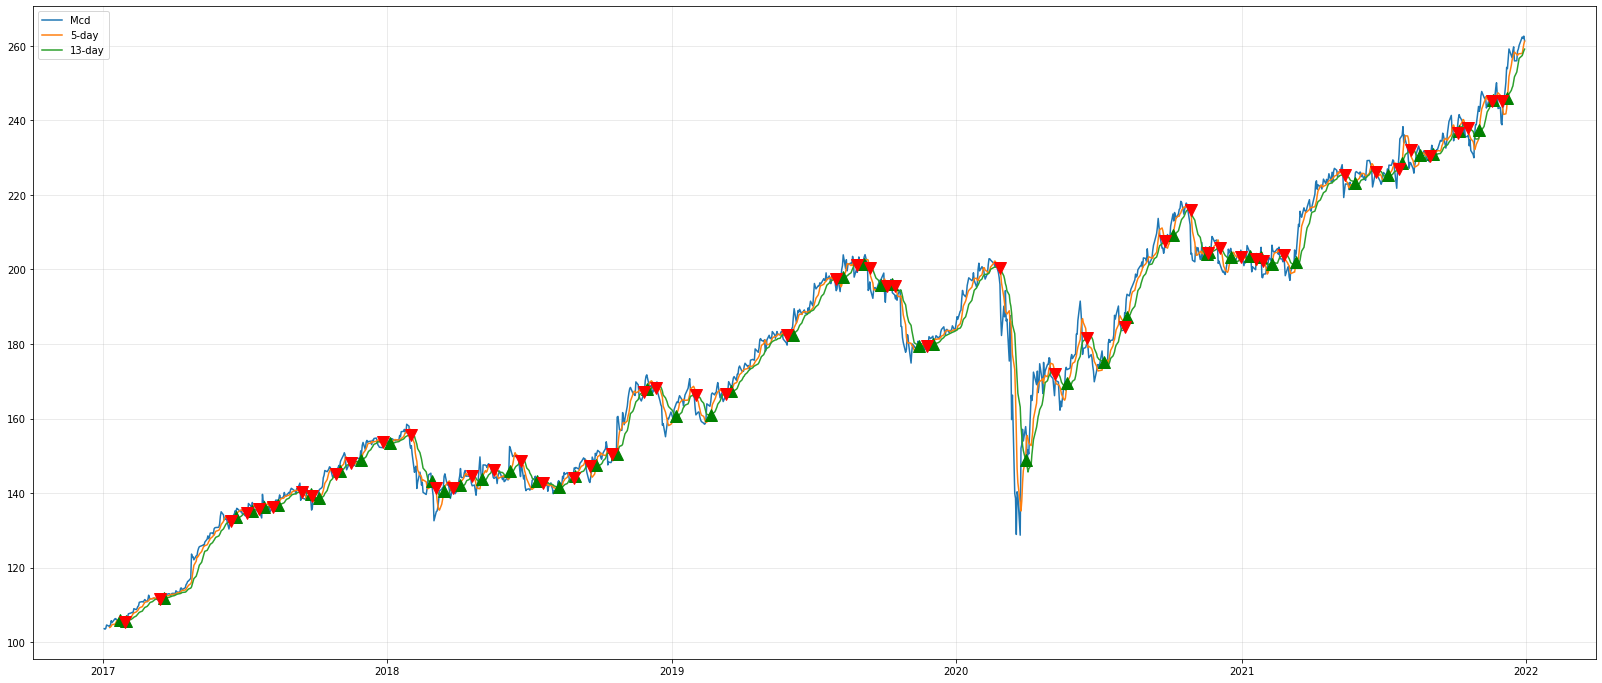

In [66]:
Mcd_data['invested_2'] = np.where(Mcd_data['5-day'] > Mcd_data['13-day'], 1, 0) # Here invested = 1 if 5-day average is greater than 13-day average
Mcd_data['signal_2'] = Mcd_data['invested_2'].diff() # 'signal' tells when you should buy and sell (+1 means buy, -1 means sell, 0 means hold)
Mcd_data['logClose_2'] = np.log(Mcd_data['MCD']) 
Mcd_data['return_2'] = Mcd_data['logClose_2'].diff() 
Mcd_data['system_return_2'] = Mcd_data['invested_2'] * Mcd_data['return_2'] # 'system_return' tells how much money you would have made
plt.rcParams['figure.figsize'] = 28, 12
plt.grid(True, alpha = .3)
plt.plot(Mcd_data['MCD'], label = 'Mcd') # Actual Value
plt.plot(Mcd_data['5-day'], label = '5-day') # 5-day Average
plt.plot(Mcd_data['13-day'], label = '13-day') # 13-day Average
plt.plot(Mcd_data.loc[Mcd_data.signal_2 == 1].index, Mcd_data['5-day'][Mcd_data.signal_2 == 1], '^',
         color = 'g', markersize = 12)
plt.plot(Mcd_data.loc[Mcd_data.signal_2 == -1].index, Mcd_data['13-day'][Mcd_data.signal_2 == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2)

* **Autodesk**

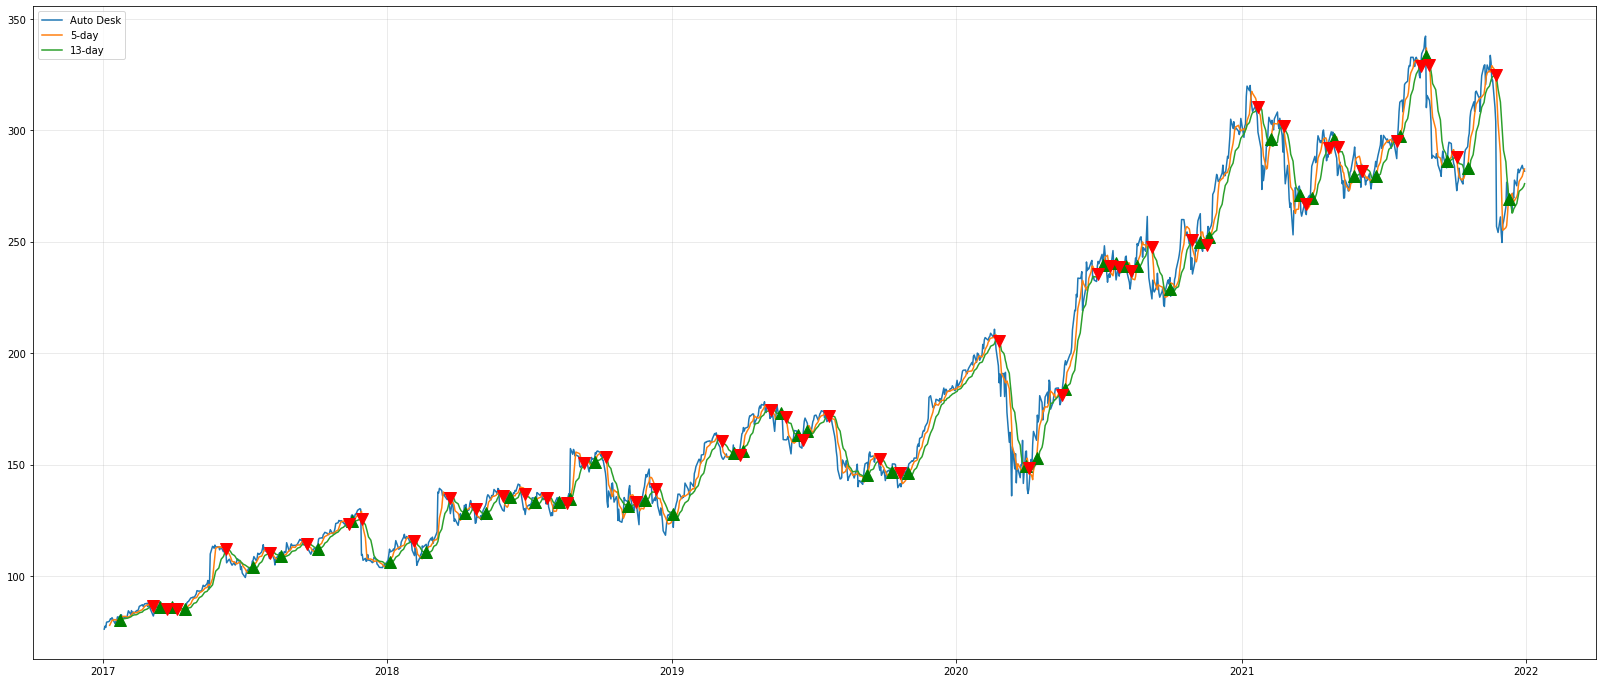

In [67]:
Autodesk_data['invested_2'] = np.where(Autodesk_data['5-day'] > Autodesk_data['13-day'], 1, 0) # Here invested = 1 if 5-day average is greater than 13-day average
Autodesk_data['signal_2'] = Autodesk_data['invested_2'].diff() # 'signal' tells when you should buy and sell (+1 means buy, -1 means sell, 0 means hold)
Autodesk_data['logClose_2'] = np.log(Autodesk_data['ADSK']) 
Autodesk_data['return_2'] = Autodesk_data['logClose_2'].diff() 
Autodesk_data['system_return_2'] = Autodesk_data['invested_2'] * Autodesk_data['return_2'] # 'system_return' tells how much money you would have made
plt.rcParams['figure.figsize'] = 28, 12
plt.grid(True, alpha = .3)
plt.plot(Autodesk_data['ADSK'], label = 'Auto Desk') # Actual Value
plt.plot(Autodesk_data['5-day'], label = '5-day') # 5-day Average
plt.plot(Autodesk_data['13-day'], label = '13-day') # 13-day Average
plt.plot(Autodesk_data.loc[Autodesk_data.signal_2 == 1].index, Autodesk_data['5-day'][Autodesk_data.signal_2 == 1], '^',
         color = 'g', markersize = 12)
plt.plot(Autodesk_data.loc[Autodesk_data.signal_2 == -1].index, Autodesk_data['13-day'][Autodesk_data.signal_2 == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2)

* **Verisk**

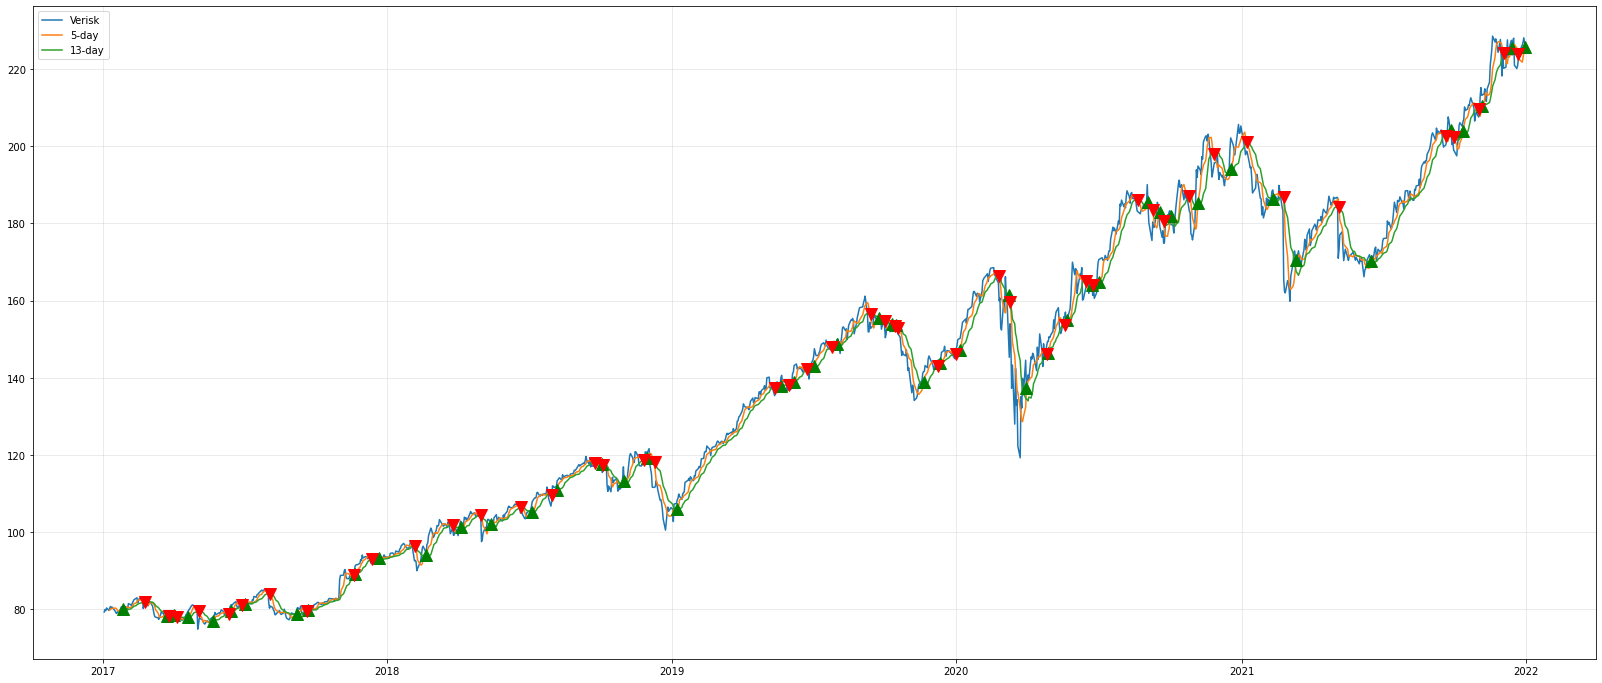

In [68]:
Verisk_data['invested_2'] = np.where(Verisk_data['5-day'] > Verisk_data['13-day'], 1, 0) # Here invested = 1 if 5-day average is greater than 13-day average
Verisk_data['signal_2'] = Verisk_data['invested_2'].diff() # 'signal' tells when you should buy and sell (+1 means buy, -1 means sell, 0 means hold)
Verisk_data['logClose_2'] = np.log(Verisk_data['VRSK']) 
Verisk_data['return_2'] = Verisk_data['logClose_2'].diff()
Verisk_data['system_return_2'] = Verisk_data['invested_2'] * Verisk_data['return_2']  # 'system_return' tells how much money you would have made
plt.rcParams['figure.figsize'] = 28, 12
plt.grid(True, alpha = .3)
plt.plot(Verisk_data['VRSK'], label = 'Verisk') # Actual Value
plt.plot(Verisk_data['5-day'], label = '5-day') # 5-day Average
plt.plot(Verisk_data['13-day'], label = '13-day') # 13-day Average
plt.plot(Verisk_data.loc[Verisk_data.signal_2 == 1].index, Verisk_data['5-day'][Verisk_data.signal_2 == 1], '^',
         color = 'g', markersize = 12)
plt.plot(Verisk_data.loc[Verisk_data.signal_2 == -1].index, Verisk_data['13-day'][Verisk_data.signal_2 == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2)

### **50-Day / 200-Day Moving Average Strategy for Long-Term Investors**

In [69]:
# We use shift() to prevent data leakage
Mcd_data['50-day'] = Mcd_data['MCD'].rolling(50).mean().shift() # 50-Day Moving Average
Mcd_data['200-day'] = Mcd_data['MCD'].rolling(200).mean().shift() # 200-Day Moving Average

In [70]:
# We use shift() to prevent data leakage
Autodesk_data['50-day'] = Autodesk_data['ADSK'].rolling(50).mean().shift() # 50-Day Moving Average
Autodesk_data['200-day'] = Autodesk_data['ADSK'].rolling(200).mean().shift() # 200-Day Moving Average

In [71]:
# We use shift() to prevent data leakage
Verisk_data['50-day'] = Verisk_data['VRSK'].rolling(50).mean().shift() # 50-Day Moving Average
Verisk_data['200-day'] = Verisk_data['VRSK'].rolling(200).mean().shift() # 200-Day Moving Average

* **McDonald's**

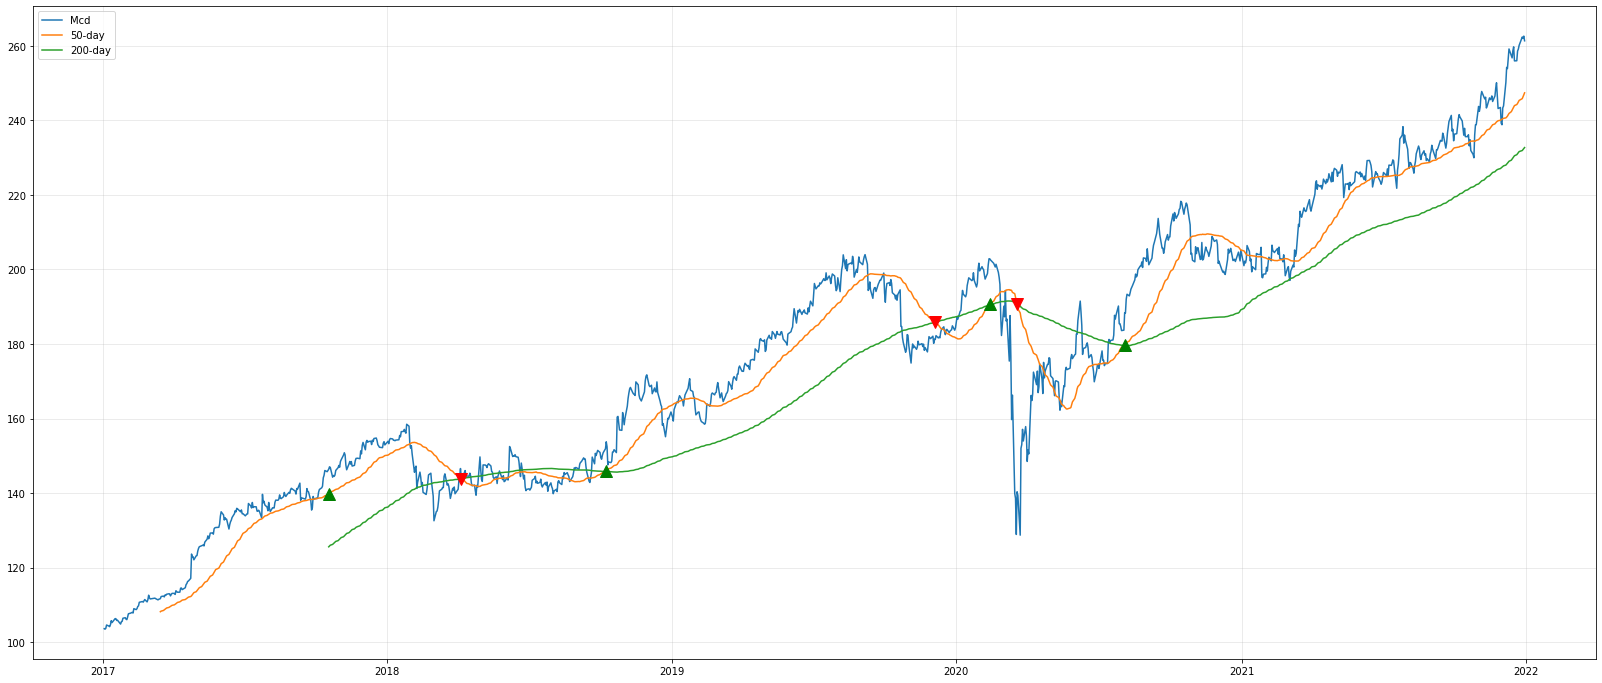

In [72]:
Mcd_data['invested_3'] = np.where(Mcd_data['50-day'] > Mcd_data['200-day'], 1, 0) # Here invested = 1 if 50-day average is greater than 200-day average
Mcd_data['signal_3'] = Mcd_data['invested_3'].diff() # 'signal' tells when you should buy and sell (+1 means buy, -1 means sell, 0 means hold)
Mcd_data['logClose_3'] = np.log(Mcd_data['MCD']) 
Mcd_data['return_3'] = Mcd_data['logClose_3'].diff() 
Mcd_data['system_return_3'] = Mcd_data['invested_3'] * Mcd_data['return_3'] # 'system_return' tells how much money you would have made
plt.rcParams['figure.figsize'] = 28, 12
plt.grid(True, alpha = .3)
plt.plot(Mcd_data['MCD'], label = 'Mcd') # Actual Value
plt.plot(Mcd_data['50-day'], label = '50-day') # 50-day Average
plt.plot(Mcd_data['200-day'], label = '200-day') # 200-day Average
plt.plot(Mcd_data.loc[Mcd_data.signal_3 == 1].index, Mcd_data['50-day'][Mcd_data.signal_3 == 1], '^',
         color = 'g', markersize = 12)
plt.plot(Mcd_data.loc[Mcd_data.signal_3 == -1].index, Mcd_data['200-day'][Mcd_data.signal_3 == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2)

* **Autodesk**

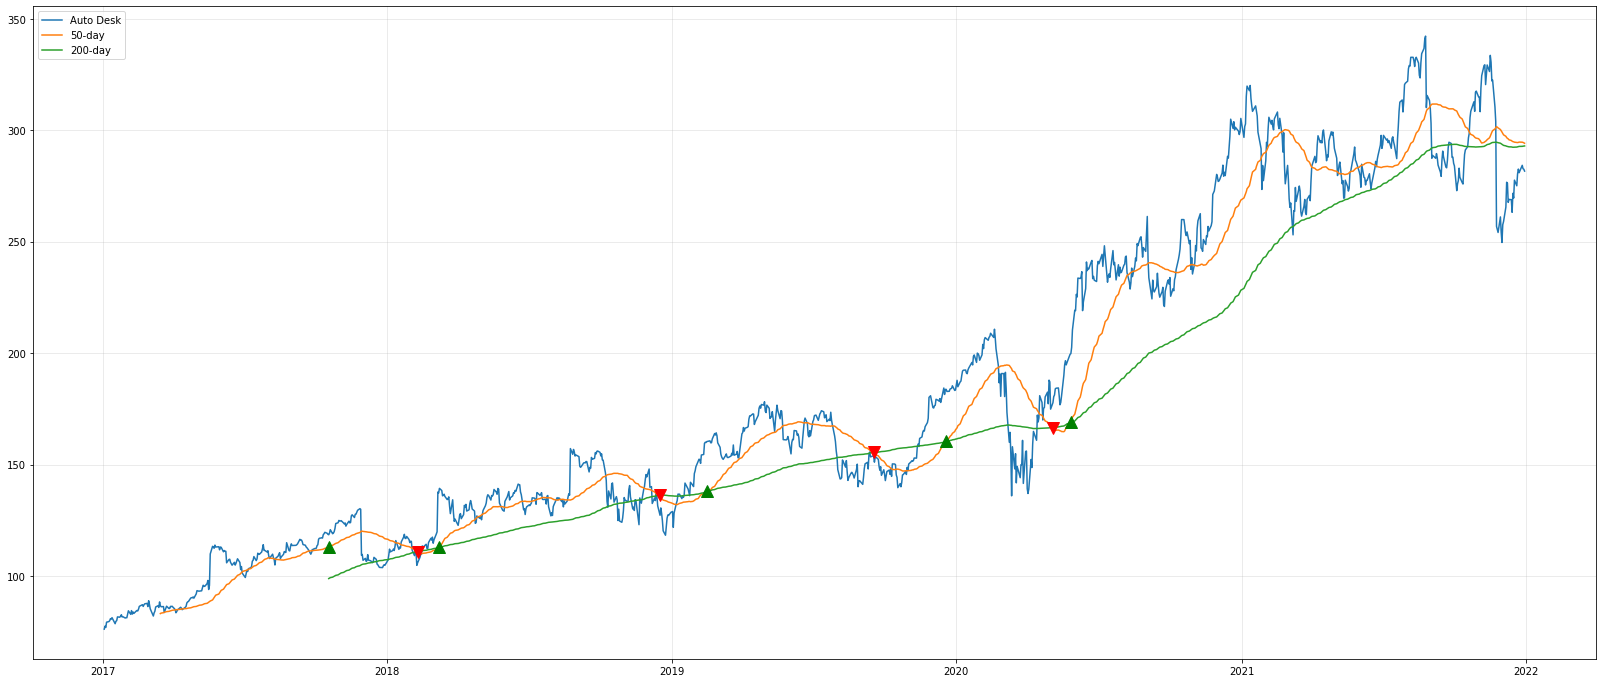

In [73]:
Autodesk_data['invested_3'] = np.where(Autodesk_data['50-day'] > Autodesk_data['200-day'], 1, 0) # Here invested = 1 if 50-day average is greater than 200-day average
Autodesk_data['signal_3'] = Autodesk_data['invested_3'].diff() # 'signal' tells when you should buy and sell (+1 means buy, -1 means sell, 0 means hold)
Autodesk_data['logClose_3'] = np.log(Autodesk_data['ADSK']) 
Autodesk_data['return_3'] = Autodesk_data['logClose_3'].diff() 
Autodesk_data['system_return_3'] = Autodesk_data['invested_3'] * Autodesk_data['return_3'] # 'system_return' tells how much money you would have made
plt.rcParams['figure.figsize'] = 28, 12
plt.grid(True, alpha = .3)
plt.plot(Autodesk_data['ADSK'], label = 'Auto Desk') # Actual Value
plt.plot(Autodesk_data['50-day'], label = '50-day') # 50-day Average
plt.plot(Autodesk_data['200-day'], label = '200-day') # 200-day Average
plt.plot(Autodesk_data.loc[Autodesk_data.signal_3 == 1].index, Autodesk_data['50-day'][Autodesk_data.signal_3 == 1], '^',
         color = 'g', markersize = 12)
plt.plot(Autodesk_data.loc[Autodesk_data.signal_3 == -1].index, Autodesk_data['200-day'][Autodesk_data.signal_3 == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2)

* **Verisk**

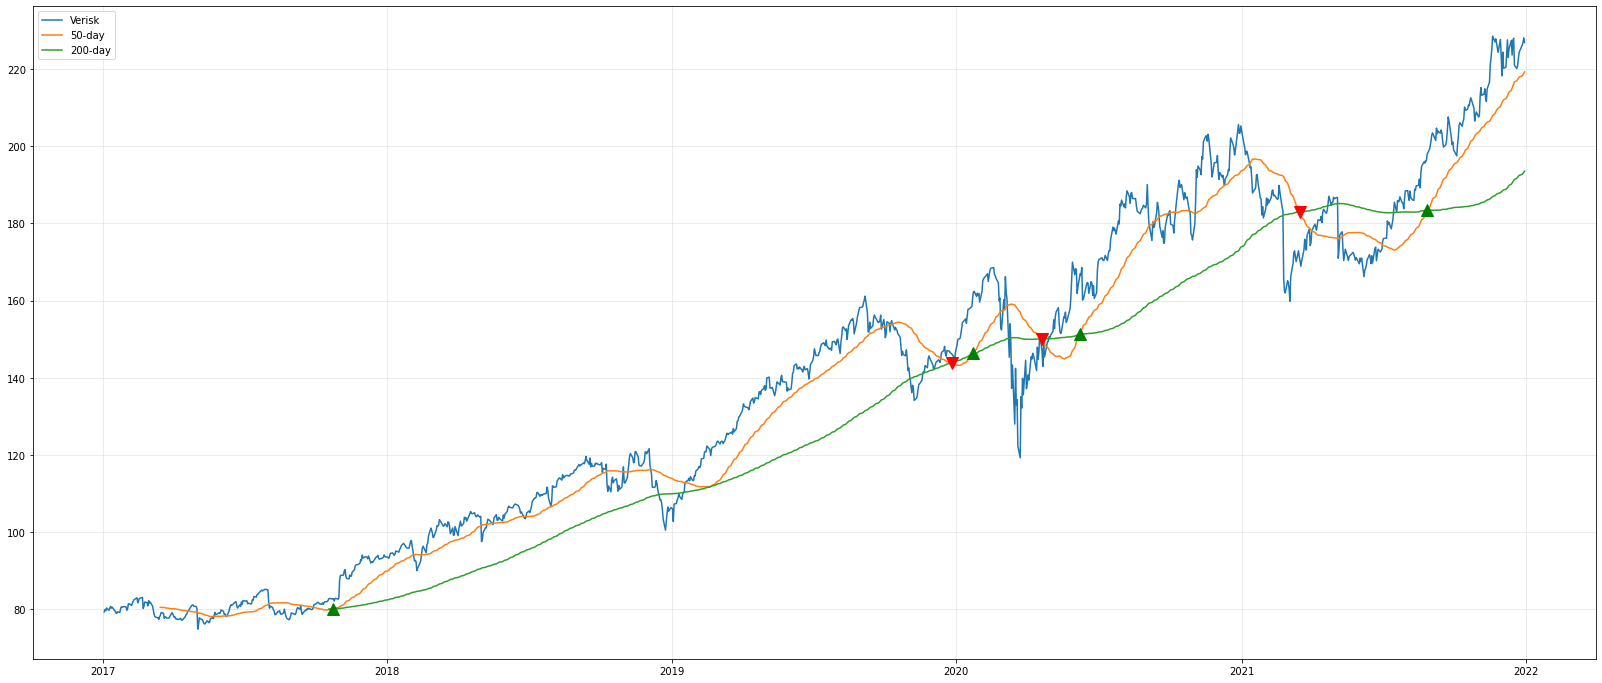

In [74]:
Verisk_data['invested_3'] = np.where(Verisk_data['50-day'] > Verisk_data['200-day'], 1, 0) # Here invested = 1 if 50-day average is greater than 200-day average
Verisk_data['signal_3'] = Verisk_data['invested_3'].diff() # 'signal' tells when you should buy and sell (+1 means buy, -1 means sell, 0 means hold)
Verisk_data['logClose_3'] = np.log(Verisk_data['VRSK']) 
Verisk_data['return_3'] = Verisk_data['logClose_3'].diff() 
Verisk_data['system_return_3'] = Verisk_data['invested_3'] * Verisk_data['return_3'] # 'system_return' tells how much money you would have made
plt.rcParams['figure.figsize'] = 28, 12
plt.grid(True, alpha = .3)
plt.plot(Verisk_data['VRSK'], label = 'Verisk') # Actual Value
plt.plot(Verisk_data['50-day'], label = '50-day') # 50-day average
plt.plot(Verisk_data['200-day'], label = '200-day') # 200-day average
plt.plot(Verisk_data.loc[Verisk_data.signal_3 == 1].index, Verisk_data['50-day'][Verisk_data.signal_3 == 1], '^',
         color = 'g', markersize = 12)
plt.plot(Verisk_data.loc[Verisk_data.signal_3 == -1].index, Verisk_data['200-day'][Verisk_data.signal_3 == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2)

### **21-Day / 55-Day Moving Average Strategy**

In [75]:
# We use shift() to prevent data leakage
Mcd_data['21-day'] = Mcd_data['MCD'].rolling(21).mean().shift() # 21-Day Moving Average
Mcd_data['55-day'] = Mcd_data['MCD'].rolling(55).mean().shift() # 55-Day Moving Average

In [76]:
# We use shift() to prevent data leakage
Autodesk_data['21-day'] = Autodesk_data['ADSK'].rolling(21).mean().shift() # 21-Day Moving Average
Autodesk_data['55-day'] = Autodesk_data['ADSK'].rolling(55).mean().shift() # 55-Day Moving Average

In [77]:
# We use shift() to prevent data leakage
Verisk_data['21-day'] = Verisk_data['VRSK'].rolling(21).mean().shift() # 21-Day Moving Average
Verisk_data['55-day'] = Verisk_data['VRSK'].rolling(55).mean().shift() # 55-Day Moving Average

* **McDonald's**

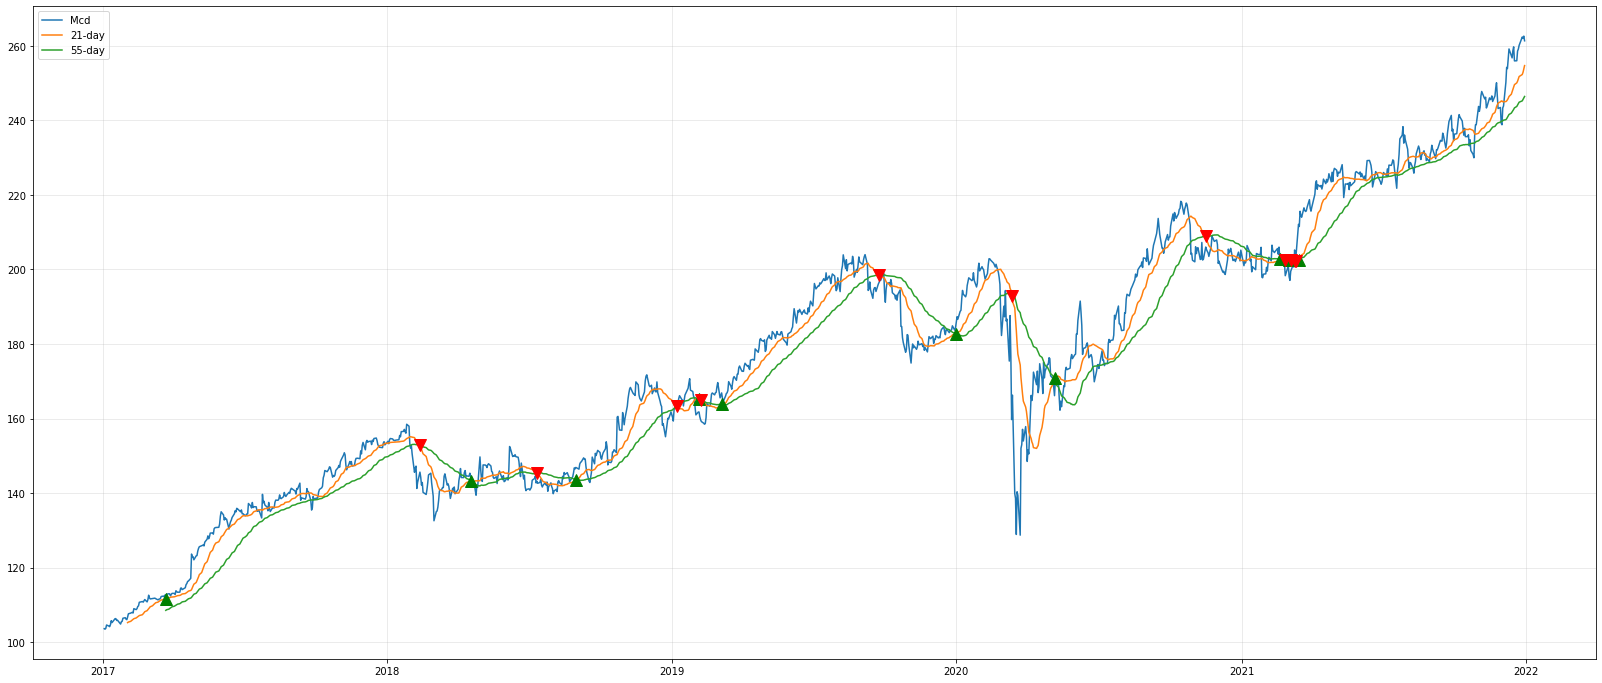

In [78]:
Mcd_data['invested_4'] = np.where(Mcd_data['21-day'] > Mcd_data['55-day'], 1, 0) # Here invested = 1 if 21-day average is greater than 55-day average
Mcd_data['signal_4'] = Mcd_data['invested_4'].diff() # 'signal' tells when you should buy and sell (+1 means buy, -1 means sell, 0 means hold)
Mcd_data['logClose_4'] = np.log(Mcd_data['MCD'])
Mcd_data['return_4'] = Mcd_data['logClose_4'].diff()
Mcd_data['system_return_4'] = Mcd_data['invested_4'] * Mcd_data['return_4'] # 'system_return' tells how much money you would have made
plt.rcParams['figure.figsize'] = 28, 12
plt.grid(True, alpha = .3)
plt.plot(Mcd_data['MCD'], label = 'Mcd') # Actual Value
plt.plot(Mcd_data['21-day'], label = '21-day') # 21-day Average
plt.plot(Mcd_data['55-day'], label = '55-day') # 55-day Average
plt.plot(Mcd_data.loc[Mcd_data.signal_4 == 1].index, Mcd_data['21-day'][Mcd_data.signal_4 == 1], '^',
         color = 'g', markersize = 12)
plt.plot(Mcd_data.loc[Mcd_data.signal_4 == -1].index, Mcd_data['55-day'][Mcd_data.signal_4 == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2)

* **Autodesk**

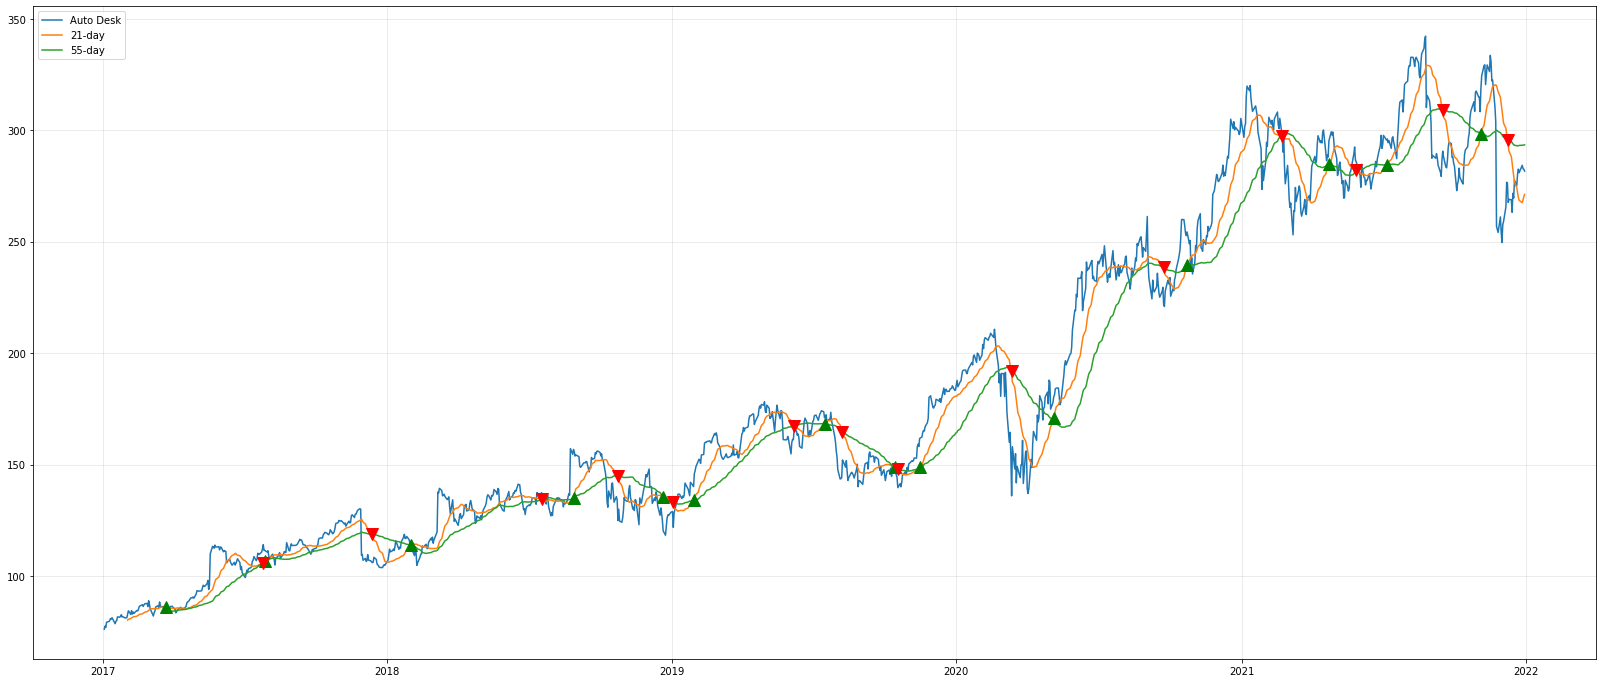

In [79]:
Autodesk_data['invested_4'] = np.where(Autodesk_data['21-day'] > Autodesk_data['55-day'], 1, 0) # Here invested = 1 if 21-day average is greater than 55-day average
Autodesk_data['signal_4'] = Autodesk_data['invested_4'].diff() # 'signal' tells when you should buy and sell (+1 means buy, -1 means sell, 0 means hold)
Autodesk_data['logClose_4'] = np.log(Autodesk_data['ADSK']) 
Autodesk_data['return_4'] = Autodesk_data['logClose_4'].diff() 
Autodesk_data['system_return_4'] = Autodesk_data['invested_4'] * Autodesk_data['return_4'] # 'system_return' tells how much money you would have made
plt.rcParams['figure.figsize'] = 28, 12
plt.grid(True, alpha = .3)
plt.plot(Autodesk_data['ADSK'], label = 'Auto Desk') # Actual Value
plt.plot(Autodesk_data['21-day'], label = '21-day') # 21-day Average
plt.plot(Autodesk_data['55-day'], label = '55-day') # 55-day Average
plt.plot(Autodesk_data.loc[Autodesk_data.signal_4 == 1].index, Autodesk_data['21-day'][Autodesk_data.signal_4 == 1], '^',
         color = 'g', markersize = 12)
plt.plot(Autodesk_data.loc[Autodesk_data.signal_4 == -1].index, Autodesk_data['55-day'][Autodesk_data.signal_4 == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2)

* **Verisk**

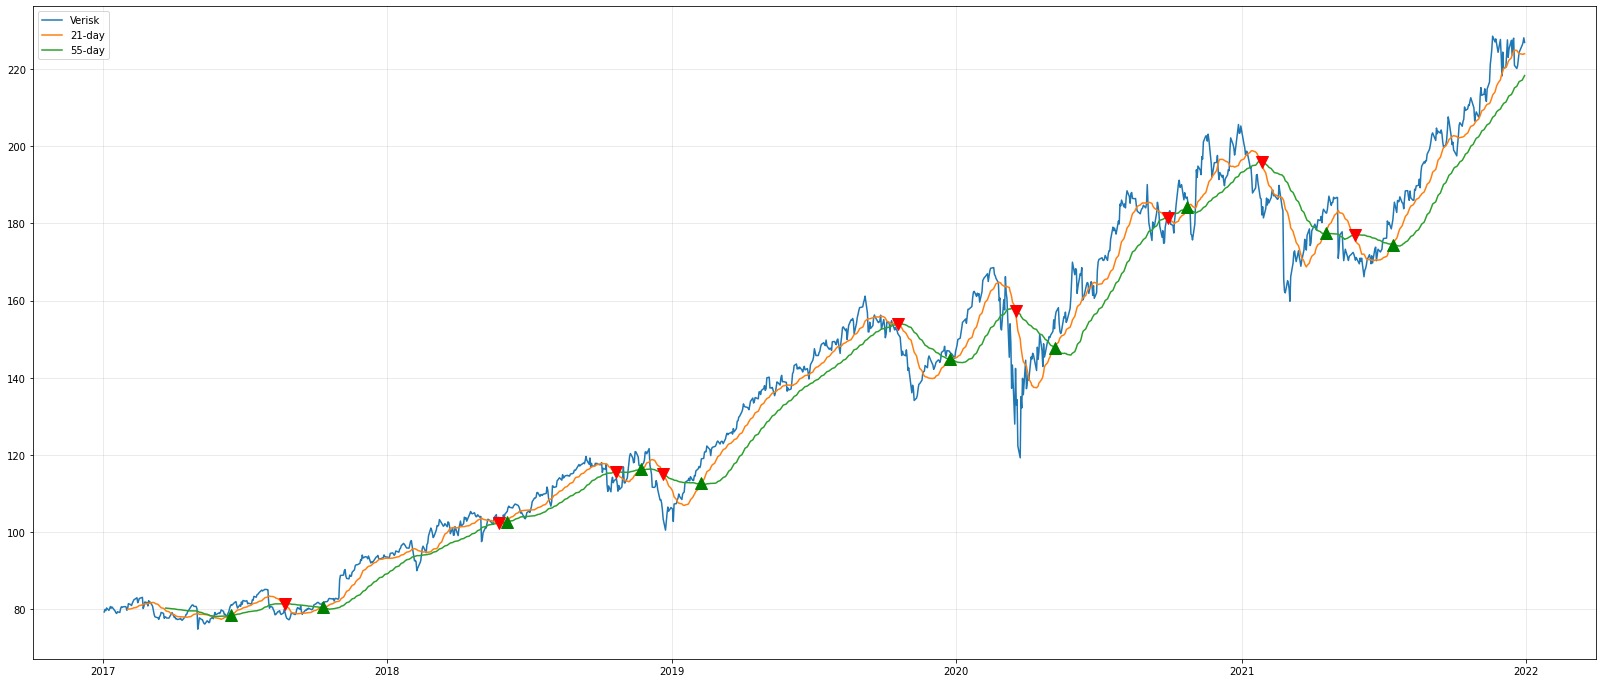

In [80]:
Verisk_data['invested_4'] = np.where(Verisk_data['21-day'] > Verisk_data['55-day'], 1, 0) # Here invested = 1 if 21-day average is greater than 55-day average
Verisk_data['signal_4'] = Verisk_data['invested_4'].diff() # 'signal' tells when you should buy and sell (+1 means buy, -1 means sell, 0 means hold)
Verisk_data['logClose_4'] = np.log(Verisk_data['VRSK']) 
Verisk_data['return_4'] = Verisk_data['logClose_4'].diff() 
Verisk_data['system_return_4'] = Verisk_data['invested_4'] * Verisk_data['return_4'] # 'system_return' tells how much money you would have made
plt.rcParams['figure.figsize'] = 28, 12
plt.grid(True, alpha = .3)
plt.plot(Verisk_data['VRSK'], label = 'Verisk') # Actual Value
plt.plot(Verisk_data['21-day'], label = '21-day') # 21-day Average
plt.plot(Verisk_data['55-day'], label = '55-day') # 55-day Average
plt.plot(Verisk_data.loc[Verisk_data.signal_4 == 1].index, Verisk_data['21-day'][Verisk_data.signal_4 == 1], '^',
         color = 'g', markersize = 12)
plt.plot(Verisk_data.loc[Verisk_data.signal_4 == -1].index, Verisk_data['55-day'][Verisk_data.signal_4 == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2)

### **15-Day / 30-Day Moving Average Strategy**

In [81]:
# We use shift() to prevent data leakage
Mcd_data['15-day'] = Mcd_data['MCD'].rolling(15).mean().shift() # 15-Day Moving Average
Mcd_data['30-day'] = Mcd_data['MCD'].rolling(30).mean().shift() # 30-Day Moving Average

In [82]:
# We use shift() to prevent data leakage
Autodesk_data['15-day'] = Autodesk_data['ADSK'].rolling(15).mean().shift() # 15-Day Moving Average
Autodesk_data['30-day'] = Autodesk_data['ADSK'].rolling(30).mean().shift() # 30-Day Moving Average

In [83]:
# We use shift() to prevent data leakage
Verisk_data['15-day'] = Verisk_data['VRSK'].rolling(15).mean().shift() # 15-Day Moving Average
Verisk_data['30-day'] = Verisk_data['VRSK'].rolling(30).mean().shift() # 30-Day Moving Average

* **McDonald's**

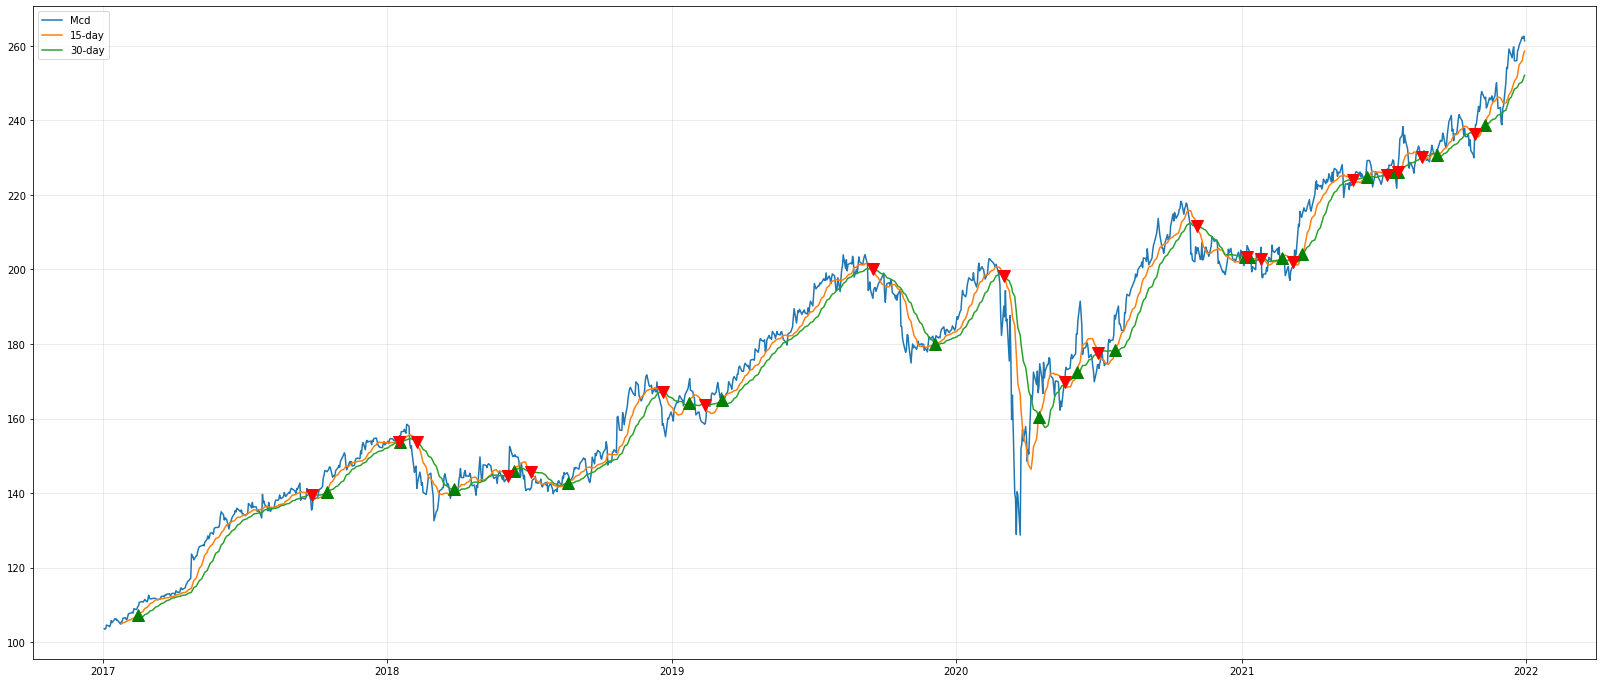

In [84]:
Mcd_data['invested_5'] = np.where(Mcd_data['15-day'] > Mcd_data['30-day'], 1, 0) # Here invested = 1 if 15-day average is greater than 30-day average
Mcd_data['signal_5'] = Mcd_data['invested_5'].diff()  # 'signal' tells when you should buy and sell (+1 means buy, -1 means sell, 0 means hold)
Mcd_data['logClose_5'] = np.log(Mcd_data['MCD']) 
Mcd_data['return_5'] = Mcd_data['logClose_5'].diff() 
Mcd_data['system_return_5'] = Mcd_data['invested_5'] * Mcd_data['return_5'] # 'system_return' tells how much money you would have made
plt.rcParams['figure.figsize'] = 28, 12
plt.grid(True, alpha = .3)
plt.plot(Mcd_data['MCD'], label = 'Mcd') # Actual Value
plt.plot(Mcd_data['15-day'], label = '15-day') # 15-day Average
plt.plot(Mcd_data['30-day'], label = '30-day') # 30-day Average
plt.plot(Mcd_data.loc[Mcd_data.signal_5 == 1].index, Mcd_data['15-day'][Mcd_data.signal_5 == 1], '^',
         color = 'g', markersize = 12)
plt.plot(Mcd_data.loc[Mcd_data.signal_5 == -1].index, Mcd_data['30-day'][Mcd_data.signal_5 == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2)

* **Autodesk**

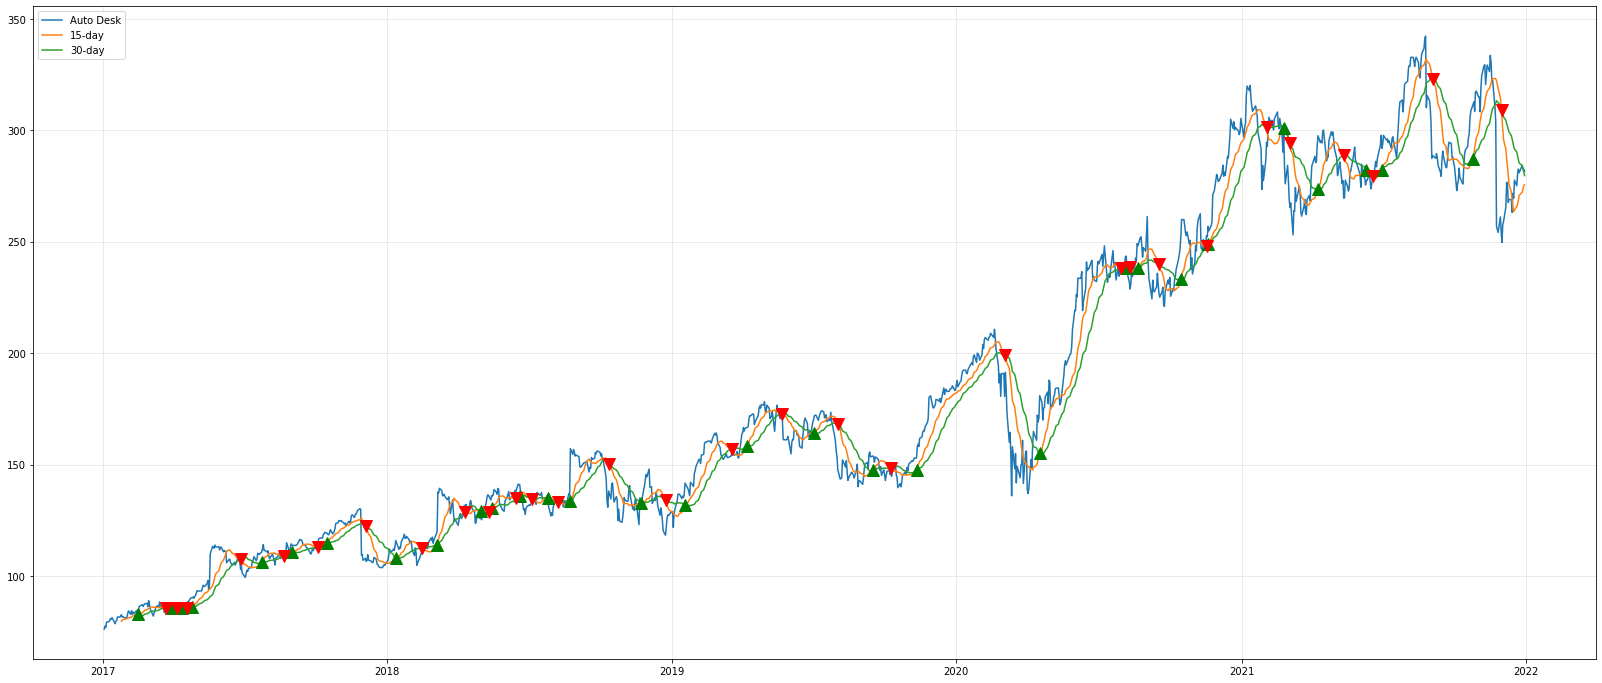

In [85]:
Autodesk_data['invested_5'] = np.where(Autodesk_data['15-day'] > Autodesk_data['30-day'], 1, 0) # Here invested = 1 if 15-day average is greater than 30-day average
Autodesk_data['signal_5'] = Autodesk_data['invested_5'].diff()  # 'signal' tells when you should buy and sell (+1 means buy, -1 means sell, 0 means hold)
Autodesk_data['logClose_5'] = np.log(Autodesk_data['ADSK']) 
Autodesk_data['return_5'] = Autodesk_data['logClose_5'].diff() 
Autodesk_data['system_return_5'] = Autodesk_data['invested_5'] * Autodesk_data['return_5'] # 'system_return' tells how much money you would have made
plt.rcParams['figure.figsize'] = 28, 12
plt.grid(True, alpha = .3)
plt.plot(Autodesk_data['ADSK'], label = 'Auto Desk') # Actual Value
plt.plot(Autodesk_data['15-day'], label = '15-day') # 15-day Average
plt.plot(Autodesk_data['30-day'], label = '30-day') # 30-day Average
plt.plot(Autodesk_data.loc[Autodesk_data.signal_5 == 1].index, Autodesk_data['15-day'][Autodesk_data.signal_5 == 1], '^',
         color = 'g', markersize = 12)
plt.plot(Autodesk_data.loc[Autodesk_data.signal_5 == -1].index, Autodesk_data['30-day'][Autodesk_data.signal_5 == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2)

* **Verisk**

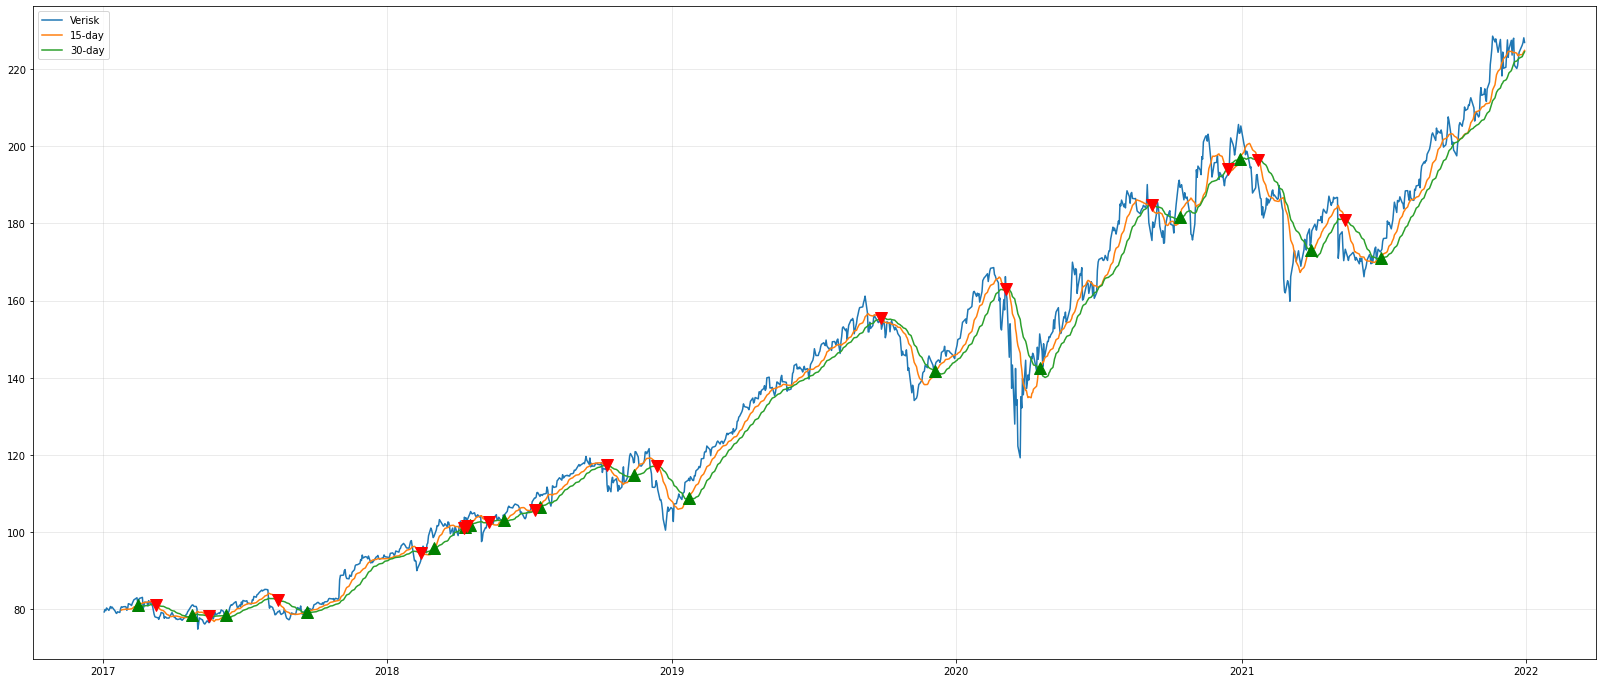

In [86]:
Verisk_data['invested_5'] = np.where(Verisk_data['15-day'] > Verisk_data['30-day'], 1, 0) # Here invested = 1 if 15-day average is greater than 30-day average
Verisk_data['signal_5'] = Verisk_data['invested_5'].diff()  # 'signal' tells when you should buy and sell (+1 means buy, -1 means sell, 0 means hold)
Verisk_data['logClose_5'] = np.log(Verisk_data['VRSK']) 
Verisk_data['return_5'] = Verisk_data['logClose_5'].diff() 
Verisk_data['system_return_5'] = Verisk_data['invested_5'] * Verisk_data['return_5'] # 'system_return' tells how much money you would have made
plt.rcParams['figure.figsize'] = 28, 12
plt.grid(True, alpha = .3)
plt.plot(Verisk_data['VRSK'], label = 'Verisk') # Actual Value
plt.plot(Verisk_data['15-day'], label = '15-day') # 15-day Average
plt.plot(Verisk_data['30-day'], label = '30-day') # 30-day Average
plt.plot(Verisk_data.loc[Verisk_data.signal_5 == 1].index, Verisk_data['15-day'][Verisk_data.signal_5 == 1], '^',
         color = 'g', markersize = 12)
plt.plot(Verisk_data.loc[Verisk_data.signal_5 == -1].index, Verisk_data['30-day'][Verisk_data.signal_5 == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2)

In [87]:
# Printing First 5 Rows of McDonald's data
Mcd_data.head()

MCD  9-day  21-day  invested_1  signal_1  logClose_1  \
2017-01-03  103.605545    NaN     NaN           0       NaN    4.640591   
2017-01-04  103.484306    NaN     NaN           0       0.0    4.639420   
2017-01-05  103.674828    NaN     NaN           0       0.0    4.641259   
2017-01-06  104.592926    NaN     NaN           0       0.0    4.650076   
2017-01-09  104.307114    NaN     NaN           0       0.0    4.647340   

            return_1  system_return_1  5-day  13-day  ...  logClose_4  \
2017-01-03       NaN              NaN    NaN     NaN  ...    4.640591   
2017-01-04 -0.001171             -0.0    NaN     NaN  ...    4.639420   
2017-01-05  0.001839              0.0    NaN     NaN  ...    4.641259   
2017-01-06  0.008817              0.0    NaN     NaN  ...    4.650076   
2017-01-09 -0.002736             -0.0    NaN     NaN  ...    4.647340   

            return_4  system_return_4  15-day  30-day  invested_5  signal_5  \
2017-01-03       NaN              NaN     NaN     NaN           0       NaN   
2017-01-04 -0.001171             -0.0     NaN     NaN           0       0.0   
2017-01-05  0.001839              0.0     NaN     NaN           0       0.0   
2017-01-06  0.008817              0.0     NaN     NaN           0       0.0   
2017-01-09 -0.002736             -0.0     NaN     NaN           0       0.0   

            logClose_5  return_5  system_return_5  
2017-01-03    4.640591       NaN              NaN  
2017-01-04    4.639420 -0.001171             -0.0  
2017-01-05    4.641259  0.001839              0.0  
2017-01-06    4.650076  0.008817              0.0  
2017-01-09    4.647340 -0.002736             -0.0  

[5 rows x 35 columns]

In [88]:
# Printing First 5 Rows of Autodesk data
Autodesk_data.head()

ADSK  9-day  21-day  invested_1  signal_1  logClose_1  \
2017-01-03  76.180000    NaN     NaN           0       NaN    4.333099   
2017-01-04  77.519997    NaN     NaN           0       0.0    4.350536   
2017-01-05  76.930000    NaN     NaN           0       0.0    4.342896   
2017-01-06  79.300003    NaN     NaN           0       0.0    4.373238   
2017-01-09  79.589996    NaN     NaN           0       0.0    4.376888   

            return_1  system_return_1  5-day  13-day  ...  logClose_4  \
2017-01-03       NaN              NaN    NaN     NaN  ...    4.333099   
2017-01-04  0.017437              0.0    NaN     NaN  ...    4.350536   
2017-01-05 -0.007640             -0.0    NaN     NaN  ...    4.342896   
2017-01-06  0.030342              0.0    NaN     NaN  ...    4.373238   
2017-01-09  0.003650              0.0    NaN     NaN  ...    4.376888   

            return_4  system_return_4  15-day  30-day  invested_5  signal_5  \
2017-01-03       NaN              NaN     NaN     NaN           0       NaN   
2017-01-04  0.017437              0.0     NaN     NaN           0       0.0   
2017-01-05 -0.007640             -0.0     NaN     NaN           0       0.0   
2017-01-06  0.030342              0.0     NaN     NaN           0       0.0   
2017-01-09  0.003650              0.0     NaN     NaN           0       0.0   

            logClose_5  return_5  system_return_5  
2017-01-03    4.333099       NaN              NaN  
2017-01-04    4.350536  0.017437              0.0  
2017-01-05    4.342896 -0.007640             -0.0  
2017-01-06    4.373238  0.030342              0.0  
2017-01-09    4.376888  0.003650              0.0  

[5 rows x 35 columns]

In [89]:
# Printing First 5 Rows of Verisk data
Verisk_data.head()

VRSK  9-day  21-day  invested_1  signal_1  logClose_1  \
2017-01-03  79.341415    NaN     NaN           0       NaN    4.373760   
2017-01-04  79.965851    NaN     NaN           0       0.0    4.381600   
2017-01-05  79.673134    NaN     NaN           0       0.0    4.377932   
2017-01-06  80.375626    NaN     NaN           0       0.0    4.386711   
2017-01-09  79.741447    NaN     NaN           0       0.0    4.378789   

            return_1  system_return_1  5-day  13-day  ...  logClose_4  \
2017-01-03       NaN              NaN    NaN     NaN  ...    4.373760   
2017-01-04  0.007839              0.0    NaN     NaN  ...    4.381600   
2017-01-05 -0.003667             -0.0    NaN     NaN  ...    4.377932   
2017-01-06  0.008779              0.0    NaN     NaN  ...    4.386711   
2017-01-09 -0.007921             -0.0    NaN     NaN  ...    4.378789   

            return_4  system_return_4  15-day  30-day  invested_5  signal_5  \
2017-01-03       NaN              NaN     NaN     NaN           0       NaN   
2017-01-04  0.007839              0.0     NaN     NaN           0       0.0   
2017-01-05 -0.003667             -0.0     NaN     NaN           0       0.0   
2017-01-06  0.008779              0.0     NaN     NaN           0       0.0   
2017-01-09 -0.007921             -0.0     NaN     NaN           0       0.0   

            logClose_5  return_5  system_return_5  
2017-01-03    4.373760       NaN              NaN  
2017-01-04    4.381600  0.007839              0.0  
2017-01-05    4.377932 -0.003667             -0.0  
2017-01-06    4.386711  0.008779              0.0  
2017-01-09    4.378789 -0.007921             -0.0  

[5 rows x 35 columns]

### **Choosing the Best Strategy of the 5 pairs (for each of the 3 stocks)**

#### **McDonald's**

In [90]:
print("Return from 9-Day/21-Day Strategy :", np.exp(np.sum(Mcd_data['system_return_1'])) -1)
print("Return from 5-Day/13-Day Strategy :", np.exp(np.sum(Mcd_data['system_return_2'])) -1)
print("Return from 50-Day/200-Day Strategy :", np.exp(np.sum(Mcd_data['system_return_3'])) -1)
print("Return from 21-Day/55-Day Strategy :", np.exp(np.sum(Mcd_data['system_return_4'])) -1)
print("Return from 15-Day/30-Day Strategy :", np.exp(np.sum(Mcd_data['system_return_5'])) -1)

Return from 9-Day/21-Day Strategy : 0.4735051943478563
Return from 5-Day/13-Day Strategy : 0.4975884301929452
Return from 50-Day/200-Day Strategy : 0.05549793691570004
Return from 21-Day/55-Day Strategy : 0.9965919364958806
Return from 15-Day/30-Day Strategy : 0.5742724181624697


* **We can see that for McDonald's, the highest return is for the 21-Day/55-Day strategy. Hence, we choose this strategy for McDonald's.**

#### **Autodesk**

In [91]:
print("Return from 9-Day/21-Day Strategy :", np.exp(np.sum(Autodesk_data['system_return_1'])) -1)
print("Return from 5-Day/13-Day Strategy :", np.exp(np.sum(Autodesk_data['system_return_2'])) -1)
print("Return from 50-Day/200-Day Strategy :", np.exp(np.sum(Autodesk_data['system_return_3'])) -1)
print("Return from 21-Day/55-Day Strategy :", np.exp(np.sum(Autodesk_data['system_return_4'])) -1)
print("Return from 15-Day/30-Day Strategy :", np.exp(np.sum(Autodesk_data['system_return_5'])) -1)

Return from 9-Day/21-Day Strategy : 0.47939845079203525
Return from 5-Day/13-Day Strategy : 1.2599689704894987
Return from 50-Day/200-Day Strategy : 0.08999367913527756
Return from 21-Day/55-Day Strategy : 0.646536441375583
Return from 15-Day/30-Day Strategy : 0.1454833642504627


* **We can see that for Autodesk, the highest return is for the 5-Day/13-Day strategy. Hence, we choose this strategy for Autodesk.**

#### **Verisk**

In [92]:
print("Return from 9-Day/21-Day Strategy :", np.exp(np.sum(Verisk_data['system_return_1'])) -1)
print("Return from 5-Day/13-Day Strategy :", np.exp(np.sum(Verisk_data['system_return_2'])) -1)
print("Return from 50-Day/200-Day Strategy :", np.exp(np.sum(Verisk_data['system_return_3'])) -1)
print("Return from 21-Day/55-Day Strategy :", np.exp(np.sum(Verisk_data['system_return_4'])) -1)
print("Return from 15-Day/30-Day Strategy :", np.exp(np.sum(Verisk_data['system_return_5'])) -1)

Return from 9-Day/21-Day Strategy : 1.3764540058100372
Return from 5-Day/13-Day Strategy : 0.7091963298202322
Return from 50-Day/200-Day Strategy : 1.0198343828780811
Return from 21-Day/55-Day Strategy : 0.9186224402001768
Return from 15-Day/30-Day Strategy : 1.7055317584658383


* **We can see that for Verisk, the highest return is for the 15-Day/30-Day strategy. Hence, we choose this strategy for Verisk.**

# **4) Analysis**

## **Buy-and-Hold Strategy** 

### **Chosen Allocation of the Stocks from MPT Model**

In [93]:
# Printing the Chosen Portfolio Allocation
chosen_allocation

MCD      ADSK      VRSK
0.000205  0.271685  0.328144  0.400171

* **If we had USD 100,000 to invest , the amount invested in McDonald's would be USD 27,168.5 , the amount invested in Autodesk would be USD 32,814.4 and the amount invested in Verisk would be USD 40,017.1.**

### **Extracting Data For 2022**

In [94]:
# Creating a ticker list for the stocks that we want to scrap
tickers_list_3 = ['MCD','ADSK','VRSK']
# Pulling historical stock price data (Monthly price) for each stock (from December 31st 2021 to November 2nd 2022)
dow_prices_3 = {ticker : si.get_data(ticker,start_date = '12/31/2021',end_date='11/02/2022',interval='1mo') for ticker in tickers_list_3}

In [95]:
# Since we just need the Adjusted Closing Price for our analysis, we will extract 'adjclose' price from the data retrieved

# Creating an Empty DataFrame to store the data
prep_data_3 = pd.DataFrame()

# Using the Tickers to add data to the DataFrame created
for i in tickers_list_3[0:]:
  prep_data_3[i] = pd.DataFrame(dow_prices_3[i]['adjclose'])

In [96]:
# Adding Variables to show Percentage Difference in Stock Prices for each of the stocks
prep_data_3['MCD_percDiff'] = prep_data_3['MCD'].pct_change()
prep_data_3['ADSK_percDiff'] = prep_data_3['ADSK'].pct_change()
prep_data_3['VRSK_percDiff'] = prep_data_3['VRSK'].pct_change()

In [97]:
# Allocating $100,000 to each of the 3 stocks based on the chosen allocation (initial_investment)
prep_data_3['mcd_init_investment']=100000*chosen_allocation['MCD'].values[0]
prep_data_3['adsk_init_investment']=100000*chosen_allocation['ADSK'].values[0]
prep_data_3['vrsk_init_investment']=100000*chosen_allocation['VRSK'].values[0]

In [98]:
# Initializing Variables to show the Value of each position on a particular day
prep_data_3[['mcd_invst_value','adsk_invst_value','vrsk_invst_value']]=[27168.503019,32814.412656,40017.083675]

In [99]:
# Printing First 5 Rows of the DataFrame
prep_data_3.head()

MCD        ADSK        VRSK  MCD_percDiff  ADSK_percDiff  \
2022-01-01  253.766525  249.789993  195.095337           NaN            NaN   
2022-02-01  239.408096  220.229996  176.404434     -0.056581      -0.118339   
2022-03-01  243.208572  214.350006  213.497726      0.015874      -0.026699   
2022-04-01  245.057617  189.279999  203.319763      0.007603      -0.116958   
2022-05-01  248.057404  207.750000  174.294022      0.012241       0.097580   

            VRSK_percDiff  mcd_init_investment  adsk_init_investment  \
2022-01-01            NaN         27168.515253          32814.405742   
2022-02-01      -0.095804         27168.515253          32814.405742   
2022-03-01       0.210274         27168.515253          32814.405742   
2022-04-01      -0.047672         27168.515253          32814.405742   
2022-05-01      -0.142759         27168.515253          32814.405742   

            vrsk_init_investment  mcd_invst_value  adsk_invst_value  \
2022-01-01          40017.078355     27168.503019      32814.412656   
2022-02-01          40017.078355     27168.503019      32814.412656   
2022-03-01          40017.078355     27168.503019      32814.412656   
2022-04-01          40017.078355     27168.503019      32814.412656   
2022-05-01          40017.078355     27168.503019      32814.412656   

            vrsk_invst_value  
2022-01-01      40017.083675  
2022-02-01      40017.083675  
2022-03-01      40017.083675  
2022-04-01      40017.083675  
2022-05-01      40017.083675

In [100]:
# 'For' Loop to Calculate the Value of Each Position on a Particular Day (McDonald's)
for i in range(1,prep_data_3.shape[0]):
  if i==1:
    prep_data_3.iloc[i,9]=prep_data_3.iloc[i-1,6] * (1+prep_data_3.iloc[i,3]) 
  else:
    prep_data_3.iloc[i,9]=prep_data_3.iloc[i-1,9] * (1+prep_data_3.iloc[i,3])

In [101]:
# 'For' Loop to Calculate the Value of Each Position on a Particular Day (Autodesk)
for i in range(1,prep_data_3.shape[0]):
  if i==1:
    prep_data_3.iloc[i,10]=prep_data_3.iloc[i-1,7] * (1+prep_data_3.iloc[i,4])
  else:
    prep_data_3.iloc[i,10]=prep_data_3.iloc[i-1,10] * (1+prep_data_3.iloc[i,4])

In [102]:
# 'For' Loop to Calculate the Value of Each Position on a Particular Day (Verisk)
for i in range(1,prep_data_3.shape[0]):
  if i==1:
    prep_data_3.iloc[i,11]=prep_data_3.iloc[i-1,8] * (1+prep_data_3.iloc[i,5])
  else:
    prep_data_3.iloc[i,11]=prep_data_3.iloc[i-1,11] * (1+prep_data_3.iloc[i,5])

In [103]:
# Adding a variable to show the Aggregate Value of the Entire Portfolio on a Particular Day
prep_data_3['Aggregate_Value']=prep_data_3['mcd_invst_value']+prep_data_3['adsk_invst_value']+prep_data_3['vrsk_invst_value']

In [104]:
# Printing Shape of the DataFrame
prep_data_3.shape

(11, 13)

In [105]:
# Printing the last 5 Rows of the DataFrame
prep_data_3.tail()

MCD        ADSK        VRSK  MCD_percDiff  ADSK_percDiff  \
2022-07-01  260.469269  216.320007  189.933350      0.072706       0.257967   
2022-08-01  249.501404  201.740005  186.848495     -0.042108      -0.067400   
2022-09-01  229.447769  186.800003  170.246170     -0.080375      -0.074056   
2022-10-01  271.132996  214.300003  182.830002      0.181676       0.147216   
2022-11-01  271.262268  201.949997  183.710007      0.000477      -0.057630   

            VRSK_percDiff  mcd_init_investment  adsk_init_investment  \
2022-07-01       0.101251         27168.515253          32814.405742   
2022-08-01      -0.016242         27168.515253          32814.405742   
2022-09-01      -0.088854         27168.515253          32814.405742   
2022-10-01       0.073916         27168.515253          32814.405742   
2022-11-01       0.004813         27168.515253          32814.405742   

            vrsk_init_investment  mcd_invst_value  adsk_invst_value  \
2022-07-01          40017.078355     27886.118135      28417.521443   
2022-08-01          40017.078355     26711.886794      26502.176118   
2022-09-01          40017.078355     24564.923249      24539.538242   
2022-10-01          40017.078355     29027.788117      28152.157571   
2022-11-01          40017.078355     29041.628165      26529.762271   

            vrsk_invst_value  Aggregate_Value  
2022-07-01      38958.274728     95261.914306  
2022-08-01      38325.523319     91539.586231  
2022-09-01      34920.128969     84024.590460  
2022-10-01      37501.267968     94681.213656  
2022-11-01      37681.770613     93253.161049

### **Value of Each Position & Aggregate Value at the Beginning of Each Month (Buy-and-Hold Strategy)**

In [106]:
# Printing Value of Each Position & Aggregate Value at the Beginning of Each Month (Buy-and-Hold Strategy)
prep_data_3[['mcd_invst_value','adsk_invst_value','vrsk_invst_value','Aggregate_Value']]

mcd_invst_value  adsk_invst_value  vrsk_invst_value  \
2022-01-01     27168.503019      32814.412656      40017.083675   
2022-02-01     25631.286512      28931.168704      36183.284426   
2022-03-01     26038.169540      28158.726371      43791.693757   
2022-04-01     26236.130252      24865.330260      41704.035695   
2022-05-01     26557.290585      27291.696930      35750.406083   
2022-06-01     25996.049858      22590.037965      35376.387025   
2022-07-01     27886.118135      28417.521443      38958.274728   
2022-08-01     26711.886794      26502.176118      38325.523319   
2022-09-01     24564.923249      24539.538242      34920.128969   
2022-10-01     29027.788117      28152.157571      37501.267968   
2022-11-01     29041.628165      26529.762271      37681.770613   

            Aggregate_Value  
2022-01-01     99999.999350  
2022-02-01     90745.739643  
2022-03-01     97988.589668  
2022-04-01     92805.496206  
2022-05-01     89599.393598  
2022-06-01     83962.474848  
2022-07-01     95261.914306  
2022-08-01     91539.586231  
2022-09-01     84024.590460  
2022-10-01     94681.213656  
2022-11-01     93253.161049

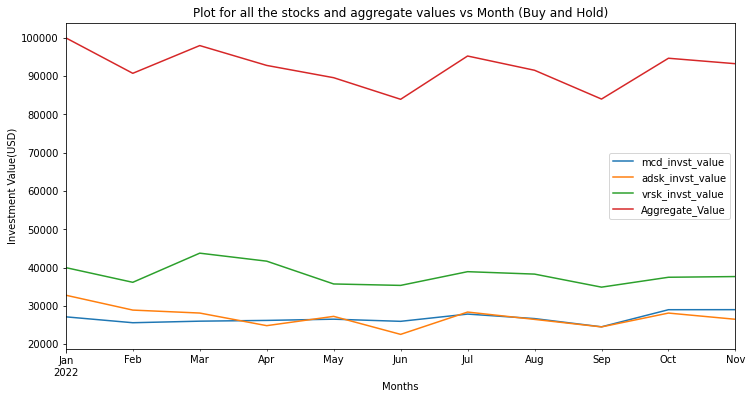

In [107]:
# Plotting the Stock value and Aggregate Value of the Investment at the beginning of each month (for Buy and Hold)
prep_data_3[['mcd_invst_value','adsk_invst_value','vrsk_invst_value','Aggregate_Value']].plot(title='Plot for all the stocks and aggregate values vs Month (Buy and Hold)',xlabel='Months',ylabel='Investment Value(USD)',figsize=(12,6))
plt.show()

* We can see that there is a slight decrease in the aggregate value , and position value for Autodesk. 

## **Momentum Trading Strategy** 

### **Extracting Data For 2022**

* **McDonald's**

In [108]:
# Creating a ticker list for the McDonald's stock that we want to scrap
tickers_list_mcd = ['MCD']
# Pulling historical stock price data (daily price) for McDonald's (from October 1st 2021 to November 2nd 2022)
dow_prices_mcd = {ticker : si.get_data(ticker,start_date = '10/01/2021',end_date='11/02/2022',interval='1d') for ticker in tickers_list_mcd}

In [109]:
# Since we just need the Adjusted Closing Price for our analysis, we will extract 'adjclose' price from the data retrieved

# Creating an Empty DataFrame to store McDonald's data
prep_data_mcd = pd.DataFrame()

# Using the Tickers to add data to the DataFrame created
for i in tickers_list_mcd[0:]:
  prep_data_mcd[i] = pd.DataFrame(dow_prices_mcd[i]['adjclose'])

In [110]:
# Printing first 5 rows of the DataFrame
prep_data_mcd.head()

MCD
2021-10-01  236.298386
2021-10-04  236.444275
2021-10-05  238.525864
2021-10-06  240.354553
2021-10-07  241.541229

* **Autodesk**

In [111]:
# Creating a ticker list for the Autodesk stock that we want to scrap
tickers_list_adsk = ['ADSK']
# Pulling historical stock price data (daily price) for Autodesk (from December 10th 2021 to November 2nd 2022)
dow_prices_adsk = {ticker : si.get_data(ticker,start_date = '12/10/2021',end_date='11/02/2022',interval='1d') for ticker in tickers_list_adsk}

In [112]:
# Since we just need the Adjusted Closing Price for our analysis, we will extract 'adjclose' price from the data retrieved

# Creating an Empty DataFrame to store Autodesk data 
prep_data_adsk = pd.DataFrame()

# Using the Tickers to add data to the DataFrame created
for i in tickers_list_adsk[0:]:
  prep_data_adsk[i] = pd.DataFrame(dow_prices_adsk[i]['adjclose'])

In [113]:
# Printing First 5 rows of the DataFrame
prep_data_adsk.head()

ADSK
2021-12-10  269.000000
2021-12-13  268.880005
2021-12-14  263.220001
2021-12-15  271.730011
2021-12-16  269.609985

* **Verisk**

In [114]:
# Creating a ticker list for the Verisk stock that we want to scrap
tickers_list_vrsk = ['VRSK']
# Pulling historical stock price data (daily price) for Verisk (from November 15th 2021 to November 2nd 2022)
dow_prices_vrsk = {ticker : si.get_data(ticker,start_date = '11/15/2021',end_date='11/02/2022',interval='1d') for ticker in tickers_list_vrsk}

In [115]:
# Since we just need the Adjusted Closing Price for our analysis, we will extract 'adjclose' price from the data retrieved

# Creating an Empty DataFrame to store Verisk data 
prep_data_vrsk = pd.DataFrame()

# Using the Tickers to add data to the DataFrame created
for i in tickers_list_vrsk[0:]:
  prep_data_vrsk[i] = pd.DataFrame(dow_prices_vrsk[i]['adjclose'])

In [116]:
# Printing First 5 rows of the DataFrame
prep_data_vrsk.head()

VRSK
2021-11-15  216.605042
2021-11-16  221.145187
2021-11-17  223.032776
2021-11-18  225.238251
2021-11-19  228.526642

### **Checking for Missing Values**

In [117]:
print("Number of Missing Values for ",prep_data_mcd.isnull().sum())
print("Number of Missing Values for ",prep_data_adsk.isnull().sum())
print("Number of Missing Values for ",prep_data_vrsk.isnull().sum())

Number of Missing Values for  MCD    0
dtype: int64
Number of Missing Values for  ADSK    0
dtype: int64
Number of Missing Values for  VRSK    0
dtype: int64


* **We can see that there are no Missing Values in any of the DataFrames created.Hence, no entries have to be removed.**

### **McDonald's (21-Day/55-Day Strategy - for 2022)**

In [118]:
# We use shift() to prevent data leakage
prep_data_mcd['21-day_mcd'] = prep_data_mcd['MCD'].rolling(21).mean().shift() # 21-Day Moving Average
prep_data_mcd['55-day_mcd'] = prep_data_mcd['MCD'].rolling(55).mean().shift() # 55-Day Moving Average
prep_data_mcd['invested_mcd'] = np.where(prep_data_mcd['21-day_mcd'] > prep_data_mcd['55-day_mcd'], 1, 0) # Here invested = 1 if 21-day average is greater than 55-day average
prep_data_mcd['signal_mcd'] = prep_data_mcd['invested_mcd'].diff() # 'signal' tells when you should buy and sell (+1 means buy, -1 means sell, 0 means hold)
prep_data_mcd['signal_mcd_1']=np.where(prep_data_mcd.index == '2021-12-31',1,prep_data_mcd['signal_mcd'])
prep_data_mcd=prep_data_mcd[prep_data_mcd.index >= '2021-12-31']

<ipython-input-119-c0421f9f537b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prep_data_mcd['logClose_mcd'] = np.log(prep_data_mcd['MCD'])
<ipython-input-119-c0421f9f537b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prep_data_mcd['return_mcd'] = prep_data_mcd['logClose_mcd'].diff()
<ipython-input-119-c0421f9f537b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

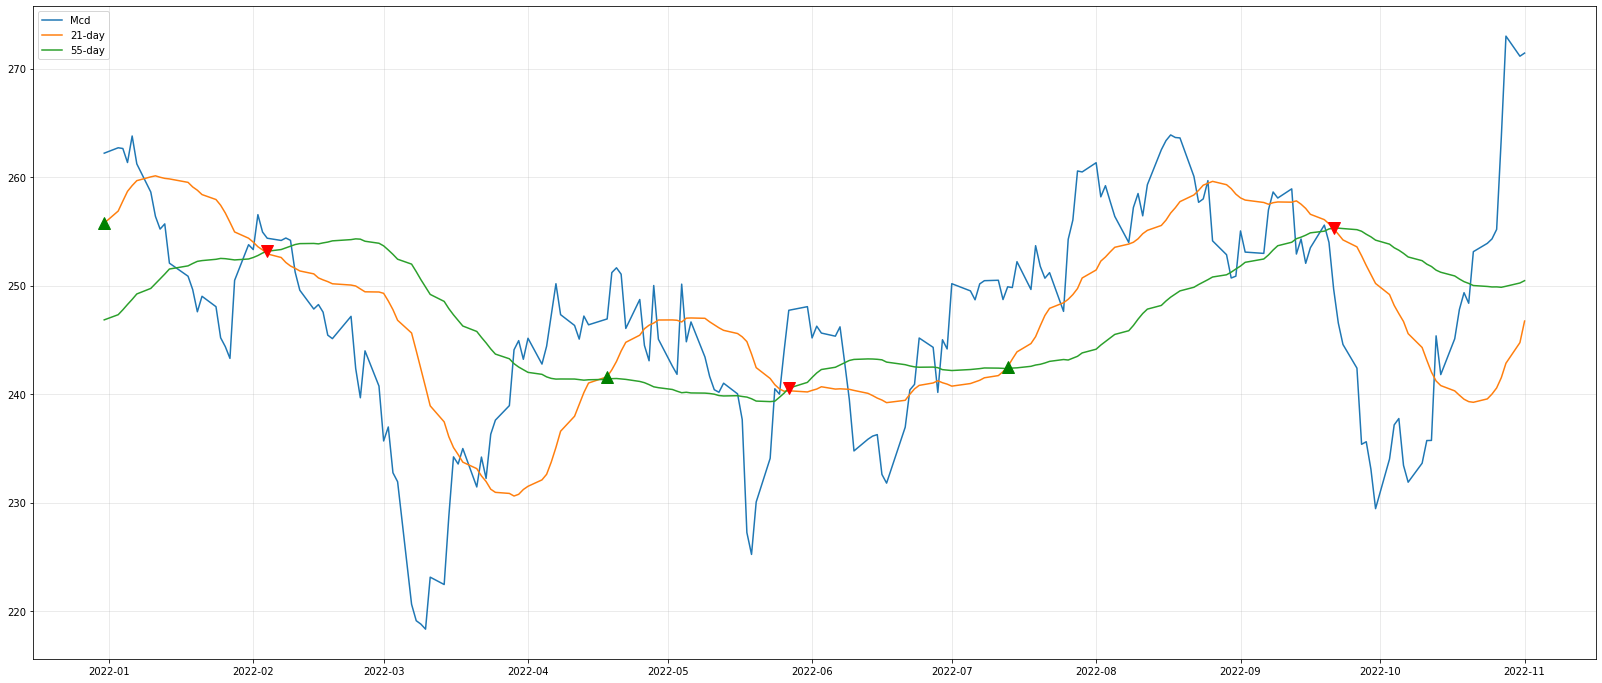

In [119]:
prep_data_mcd['logClose_mcd'] = np.log(prep_data_mcd['MCD']) 
prep_data_mcd['return_mcd'] = prep_data_mcd['logClose_mcd'].diff() 
prep_data_mcd['system_return_mcd'] = prep_data_mcd['invested_mcd'] * prep_data_mcd['return_mcd'] # 'system_return' tells how much money you would have made
plt.rcParams['figure.figsize'] = 28, 12
plt.grid(True, alpha = .3)
plt.plot(prep_data_mcd['MCD'], label = 'Mcd') # Actual Value
plt.plot(prep_data_mcd['21-day_mcd'], label = '21-day') # 21-day Average
plt.plot(prep_data_mcd['55-day_mcd'], label = '55-day') # 55-day Average
plt.plot(prep_data_mcd.loc[prep_data_mcd.signal_mcd_1 == 1].index, prep_data_mcd['21-day_mcd'][prep_data_mcd.signal_mcd_1 == 1], '^',
         color = 'g', markersize = 12)
plt.plot(prep_data_mcd.loc[prep_data_mcd.signal_mcd_1 == -1].index, prep_data_mcd['55-day_mcd'][prep_data_mcd.signal_mcd_1 == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2)
plt.show()

In [120]:
# Printing the First 5 rows of the DataFrame
prep_data_mcd.head()

MCD  21-day_mcd  55-day_mcd  invested_mcd  signal_mcd  \
2021-12-31  262.197693  255.753443  246.840842             1         0.0   
2022-01-03  262.696503  256.866142  247.316691             1         0.0   
2022-01-04  262.628052  257.787413  247.768006             1         0.0   
2022-01-05  261.337006  258.680739  248.258753             1         0.0   
2022-01-06  263.782196  259.211706  248.725850             1         0.0   

            signal_mcd_1  logClose_mcd  return_mcd  system_return_mcd  
2021-12-31           1.0      5.569099         NaN                NaN  
2022-01-03           0.0      5.570999    0.001901           0.001901  
2022-01-04           0.0      5.570739   -0.000261          -0.000261  
2022-01-05           0.0      5.565811   -0.004928          -0.004928  
2022-01-06           0.0      5.575124    0.009313           0.009313

In [121]:
# Printing the Shape of the DataFrame
prep_data_mcd.shape

(211, 9)

### **Autodesk (5-Day/13-Day Strategy - for 2022)**

In [122]:
# We use shift() to prevent data leakage
prep_data_adsk['5-day_adsk'] = prep_data_adsk['ADSK'].rolling(5).mean().shift() # 5-Day Moving Average
prep_data_adsk['13-day_adsk'] = prep_data_adsk['ADSK'].rolling(13).mean().shift() # 13-Day Moving Average
prep_data_adsk['invested_adsk'] = np.where(prep_data_adsk['5-day_adsk'] > prep_data_adsk['13-day_adsk'], 1, 0) # Here invested = 1 if 5-day average is greater than 13-day average
prep_data_adsk['signal_adsk'] = prep_data_adsk['invested_adsk'].diff() # 'signal' tells when you should buy and sell (+1 means buy, -1 means sell, 0 means hold)
prep_data_adsk['signal_adsk_1']=np.where(prep_data_adsk.index == '2021-12-31',1,prep_data_adsk['signal_adsk'])
prep_data_adsk=prep_data_adsk[prep_data_adsk.index >= '2021-12-31']

<ipython-input-123-57cd549e6733>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prep_data_adsk['logClose_adsk'] = np.log(prep_data_adsk['ADSK'])
<ipython-input-123-57cd549e6733>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prep_data_adsk['return_adsk'] = prep_data_adsk['logClose_adsk'].diff()
<ipython-input-123-57cd549e6733>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

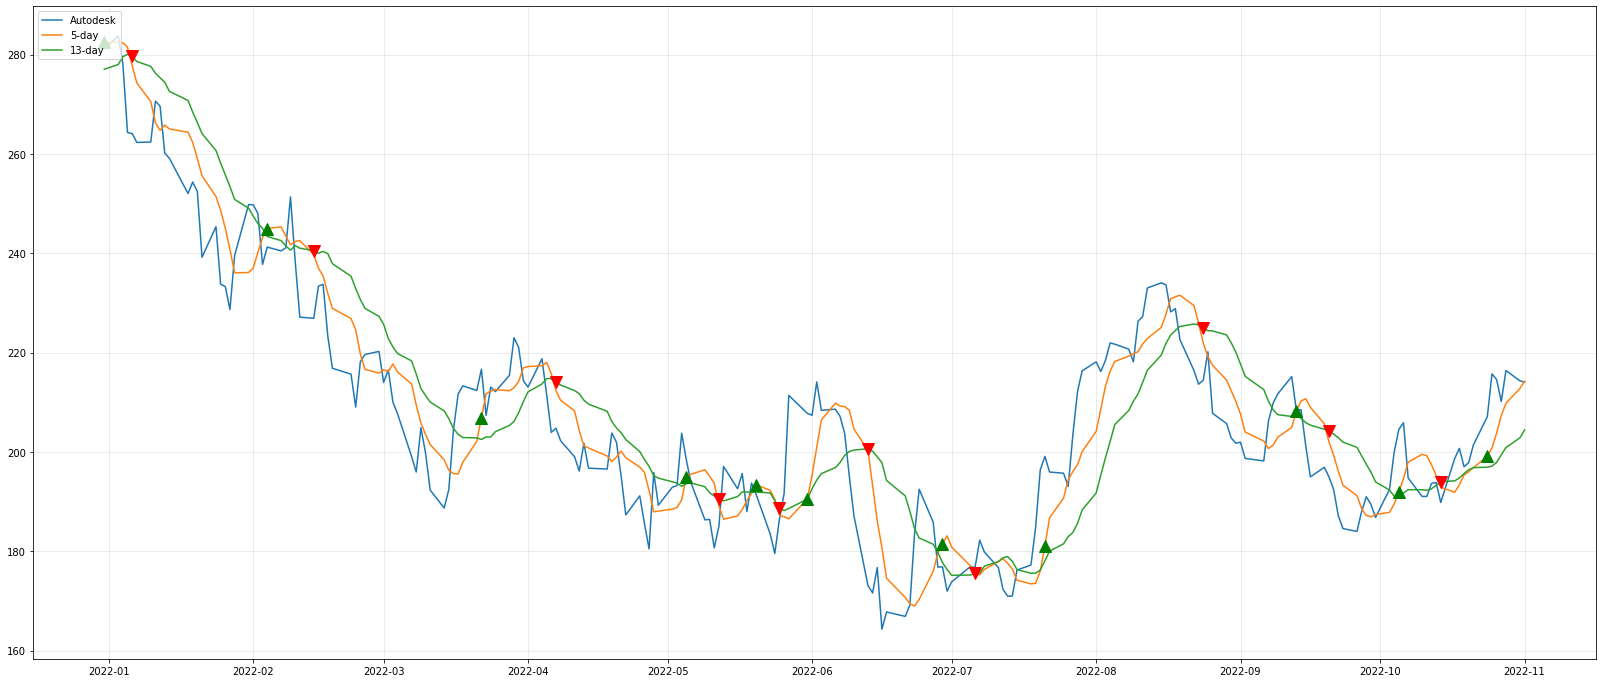

In [123]:
prep_data_adsk['logClose_adsk'] = np.log(prep_data_adsk['ADSK']) 
prep_data_adsk['return_adsk'] = prep_data_adsk['logClose_adsk'].diff() 
prep_data_adsk['system_return_adsk'] = prep_data_adsk['invested_adsk'] * prep_data_adsk['return_adsk'] # 'system_return' tells how much money you would have made
plt.rcParams['figure.figsize'] = 28, 12
plt.grid(True, alpha = .3)
plt.plot(prep_data_adsk['ADSK'], label = 'Autodesk') # Actual Value
plt.plot(prep_data_adsk['5-day_adsk'], label = '5-day') # 5-day Average
plt.plot(prep_data_adsk['13-day_adsk'], label = '13-day') # 13-day Average
plt.plot(prep_data_adsk.loc[prep_data_adsk.signal_adsk_1 == 1].index, prep_data_adsk['5-day_adsk'][prep_data_adsk.signal_adsk_1 == 1], '^',
         color = 'g', markersize = 12)
plt.plot(prep_data_adsk.loc[prep_data_adsk.signal_adsk_1 == -1].index, prep_data_adsk['13-day_adsk'][prep_data_adsk.signal_adsk_1 == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2)

In [124]:
# Printing the First 5 rows of the DataFrame
prep_data_adsk.head()

ADSK  5-day_adsk  13-day_adsk  invested_adsk  signal_adsk  \
2021-12-31  281.190002  282.467993   277.044612              1          0.0   
2022-01-03  283.720001  282.507996   277.991535              1          0.0   
2022-01-04  278.190002  282.391998   279.568458              1          0.0   
2022-01-05  264.320007  281.476001   280.065380              1          0.0   
2022-01-06  264.109985  277.826001   279.658459              0         -1.0   

            signal_adsk_1  logClose_adsk  return_adsk  system_return_adsk  
2021-12-31            1.0       5.639031          NaN                 NaN  
2022-01-03            0.0       5.647988     0.008957            0.008957  
2022-01-04            0.0       5.628304    -0.019683           -0.019683  
2022-01-05            0.0       5.577161    -0.051144           -0.051144  
2022-01-06           -1.0       5.576366    -0.000795           -0.000000

In [125]:
# Printing the Shape of the DataFrame
prep_data_adsk.shape

(211, 9)

### **Verisk (15-Day/30-Day Strategy - for 2022)**

In [126]:
# We use shift() to prevent data leakage
prep_data_vrsk['15-day'] = prep_data_vrsk['VRSK'].rolling(15).mean().shift() # 15-Day Moving Average
prep_data_vrsk['30-day'] = prep_data_vrsk['VRSK'].rolling(30).mean().shift() # 30-Day Moving Average
prep_data_vrsk['invested_vrsk'] = np.where(prep_data_vrsk['15-day'] > prep_data_vrsk['30-day'], 1, 0) # Here invested = 1 if 15-day average is greater than 30-day average
prep_data_vrsk['signal_vrsk'] = prep_data_vrsk['invested_vrsk'].diff() # 'signal' tells when you should buy and sell (+1 means buy, -1 means sell, 0 means hold)
prep_data_vrsk['signal_vrsk_1']=np.where(prep_data_vrsk.index == '2021-12-31',1,prep_data_vrsk['signal_vrsk'])
prep_data_vrsk=prep_data_vrsk[prep_data_vrsk.index >= '2021-12-31']

<ipython-input-127-40a9cb0534b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prep_data_vrsk['logClose_vrsk'] = np.log(prep_data_vrsk['VRSK'])
<ipython-input-127-40a9cb0534b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prep_data_vrsk['return_vrsk'] = prep_data_vrsk['logClose_vrsk'].diff()
<ipython-input-127-40a9cb0534b3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

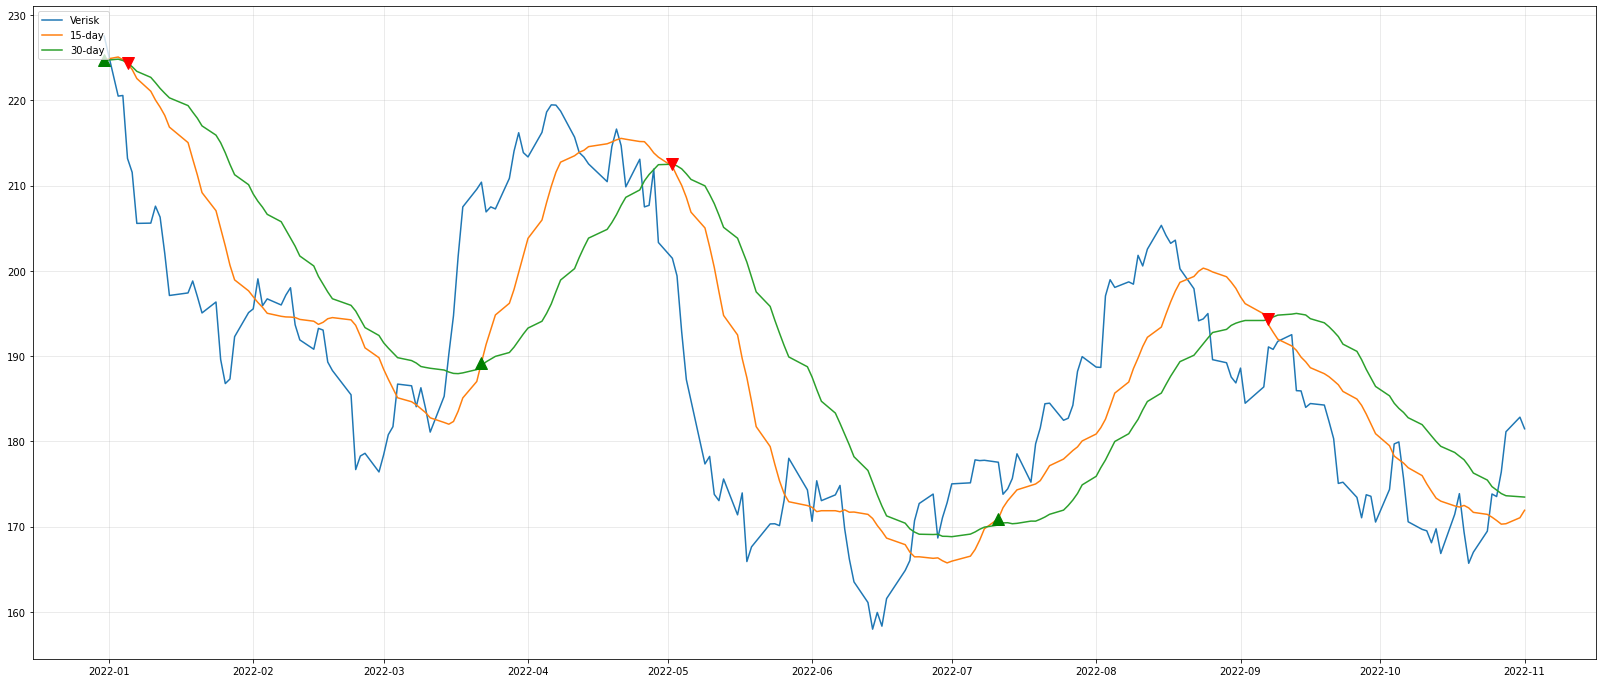

In [127]:
prep_data_vrsk['logClose_vrsk'] = np.log(prep_data_vrsk['VRSK'])
prep_data_vrsk['return_vrsk'] = prep_data_vrsk['logClose_vrsk'].diff() 
prep_data_vrsk['system_return_vrsk'] = prep_data_vrsk['invested_vrsk'] * prep_data_vrsk['return_vrsk'] # 'system_return' tells how much money you would have made
plt.rcParams['figure.figsize'] = 28, 12
plt.grid(True, alpha = .3)
plt.plot(prep_data_vrsk['VRSK'], label = 'Verisk') # Actual Value
plt.plot(prep_data_vrsk['15-day'], label = '15-day') # 15-day Average
plt.plot(prep_data_vrsk['30-day'], label = '30-day') # 30-day Average
plt.plot(prep_data_vrsk.loc[prep_data_vrsk.signal_vrsk_1 == 1].index, prep_data_vrsk['15-day'][prep_data_vrsk.signal_vrsk_1 == 1], '^',
         color = 'g', markersize = 12)
plt.plot(prep_data_vrsk.loc[prep_data_vrsk.signal_vrsk_1 == -1].index, prep_data_vrsk['30-day'][prep_data_vrsk.signal_vrsk_1 == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2)

In [128]:
# Printing the First 5 rows of the DataFrame
prep_data_vrsk.head()

VRSK      15-day      30-day  invested_vrsk  signal_vrsk  \
2021-12-31  227.523331  224.775146  224.672569              1          0.0   
2022-01-03  220.490631  225.074517  224.822254              1          0.0   
2022-01-04  220.560257  224.761981  224.664000              1          0.0   
2022-01-05  213.179398  224.303081  224.398454              0         -1.0   
2022-01-06  211.548065  223.607436  223.936552              0          0.0   

            signal_vrsk_1  logClose_vrsk  return_vrsk  system_return_vrsk  
2021-12-31            1.0       5.427253          NaN                 NaN  
2022-01-03            0.0       5.395855    -0.031398           -0.031398  
2022-01-04            0.0       5.396171     0.000316            0.000316  
2022-01-05           -1.0       5.362134    -0.034037           -0.000000  
2022-01-06            0.0       5.354452    -0.007682           -0.000000

In [129]:
# Printing the Shape of the DataFrame
prep_data_vrsk.shape

(211, 9)

#### **McDonald's**

In [130]:
# Creating a new DataFrame for McDonald's for Momentum Trading Strategy
mt_mcd=prep_data_3[['MCD']]

# Adding a Variable for Initial Investment
mt_mcd['mcd_invst_value_mt']=27168.503019

<ipython-input-130-609c8de59506>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mt_mcd['mcd_invst_value_mt']=27168.503019


In [131]:
# Adding a Variable for System Return for each month
mt_mcd['sys_return_month_mcd']=[0,(np.exp(np.sum(prep_data_mcd['system_return_mcd']['2021-12-31':'2022-02-01'])) -1),(np.exp(np.sum(prep_data_mcd['system_return_mcd']['2022-02-01':'2022-03-01'])) -1),(np.exp(np.sum(prep_data_mcd['system_return_mcd']['2022-03-01':'2022-04-01'])) -1),(np.exp(np.sum(prep_data_mcd['system_return_mcd']['2022-04-01':'2022-05-01'])) -1),(np.exp(np.sum(prep_data_mcd['system_return_mcd']['2022-05-01':'2022-06-01'])) -1),(np.exp(np.sum(prep_data_mcd['system_return_mcd']['2022-06-01':'2022-07-01'])) -1),(np.exp(np.sum(prep_data_mcd['system_return_mcd']['2022-07-01':'2022-08-01'])) -1),(np.exp(np.sum(prep_data_mcd['system_return_mcd']['2022-08-01':'2022-09-01'])) -1),(np.exp(np.sum(prep_data_mcd['system_return_mcd']['2022-09-01':'2022-10-01'])) -1),(np.exp(np.sum(prep_data_mcd['system_return_mcd']['2022-10-01':'2022-11-01'])) -1)]

<ipython-input-131-81ad17aea58c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mt_mcd['sys_return_month_mcd']=[0,(np.exp(np.sum(prep_data_mcd['system_return_mcd']['2021-12-31':'2022-02-01'])) -1),(np.exp(np.sum(prep_data_mcd['system_return_mcd']['2022-02-01':'2022-03-01'])) -1),(np.exp(np.sum(prep_data_mcd['system_return_mcd']['2022-03-01':'2022-04-01'])) -1),(np.exp(np.sum(prep_data_mcd['system_return_mcd']['2022-04-01':'2022-05-01'])) -1),(np.exp(np.sum(prep_data_mcd['system_return_mcd']['2022-05-01':'2022-06-01'])) -1),(np.exp(np.sum(prep_data_mcd['system_return_mcd']['2022-06-01':'2022-07-01'])) -1),(np.exp(np.sum(prep_data_mcd['system_return_mcd']['2022-07-01':'2022-08-01'])) -1),(np.exp(np.sum(prep_data_mcd['system_return_mcd']['2022-08-

In [132]:
# 'For' Loop to calculate the Value of Investment at the beginning of each month
for i in range(0,mt_mcd.shape[0]):
  if i==0:
    mt_mcd.iloc[i,1]=(1+mt_mcd.iloc[i,2]) * (mt_mcd.iloc[i,1])
  else:
    mt_mcd.iloc[i,1]=(1+mt_mcd.iloc[i,2]) * (mt_mcd.iloc[i-1,1])

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [133]:
# Printing the First 5 Rows of the DataFrame
mt_mcd.head()

MCD  mcd_invst_value_mt  sys_return_month_mcd
2022-01-01  253.766525        27168.503019              0.000000
2022-02-01  239.408096        26248.257364             -0.033872
2022-03-01  243.208572        26368.649153              0.004587
2022-04-01  245.057617        26368.649153              0.000000
2022-05-01  248.057404        26226.546539             -0.005389

#### **Autodesk**

In [134]:
# Creating a new DataFrame for Autodesk for Momentum Trading Strategy
mt_adsk=prep_data_3[['ADSK']]

# Adding a Variable for Initial Investment
mt_adsk['adsk_invst_value_mt']=32814.394198

<ipython-input-134-493054cf41b3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mt_adsk['adsk_invst_value_mt']=32814.394198


In [135]:
# Adding a Variable for System Return for each month
mt_adsk['sys_return_month_adsk']=[0,(np.exp(np.sum(prep_data_adsk['system_return_adsk']['2021-12-31':'2022-02-01'])) -1),(np.exp(np.sum(prep_data_adsk['system_return_adsk']['2022-02-01':'2022-03-01'])) -1),(np.exp(np.sum(prep_data_adsk['system_return_adsk']['2022-03-01':'2022-04-01'])) -1),(np.exp(np.sum(prep_data_adsk['system_return_adsk']['2022-04-01':'2022-05-01'])) -1),(np.exp(np.sum(prep_data_adsk['system_return_adsk']['2022-05-01':'2022-06-01'])) -1),(np.exp(np.sum(prep_data_adsk['system_return_adsk']['2022-06-01':'2022-07-01'])) -1),(np.exp(np.sum(prep_data_adsk['system_return_adsk']['2022-07-01':'2022-08-01'])) -1),(np.exp(np.sum(prep_data_adsk['system_return_adsk']['2022-08-01':'2022-09-01'])) -1),(np.exp(np.sum(prep_data_adsk['system_return_adsk']['2022-09-01':'2022-10-01'])) -1),(np.exp(np.sum(prep_data_adsk['system_return_adsk']['2022-10-01':'2022-11-01'])) -1)]

<ipython-input-135-4f107a19ab46>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mt_adsk['sys_return_month_adsk']=[0,(np.exp(np.sum(prep_data_adsk['system_return_adsk']['2021-12-31':'2022-02-01'])) -1),(np.exp(np.sum(prep_data_adsk['system_return_adsk']['2022-02-01':'2022-03-01'])) -1),(np.exp(np.sum(prep_data_adsk['system_return_adsk']['2022-03-01':'2022-04-01'])) -1),(np.exp(np.sum(prep_data_adsk['system_return_adsk']['2022-04-01':'2022-05-01'])) -1),(np.exp(np.sum(prep_data_adsk['system_return_adsk']['2022-05-01':'2022-06-01'])) -1),(np.exp(np.sum(prep_data_adsk['system_return_adsk']['2022-06-01':'2022-07-01'])) -1),(np.exp(np.sum(prep_data_adsk['system_return_adsk']['2022-07-01':'2022-08-01'])) -1),(np.exp(np.sum(prep_data_adsk['system_retur

In [136]:
# 'For' Loop to calculate the Value of Investment at the beginning of each month
for i in range(0,mt_adsk.shape[0]):
  if i==0:
    mt_adsk.iloc[i,1]=(1+mt_adsk.iloc[i,2]) * (mt_adsk.iloc[i,1])
  else:
    mt_adsk.iloc[i,1]=(1+mt_adsk.iloc[i,2]) * (mt_adsk.iloc[i-1,1])

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [137]:
# Printing the First 5 Rows of the DataFrame
mt_adsk.head()

ADSK  adsk_invst_value_mt  sys_return_month_adsk
2022-01-01  249.789993         32814.394198               0.000000
2022-02-01  220.229996         30845.694511              -0.059995
2022-03-01  214.350006         29466.617205              -0.044709
2022-04-01  189.279999         29558.187151               0.003108
2022-05-01  207.750000         28122.680607              -0.048565

#### **Verisk**

In [138]:
# Creating a new DataFrame for Verisk for Momentum Trading Strategy
mt_vrsk=prep_data_3[['VRSK']]

# Adding a Variable for Initial Investment
mt_vrsk['vrsk_invst_value_mt']=40017.083675

<ipython-input-138-454ec98c1cc7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mt_vrsk['vrsk_invst_value_mt']=40017.083675


In [139]:
# Adding a Variable for System Return for each month
mt_vrsk['sys_return_month_vrsk']=[0,(np.exp(np.sum(prep_data_vrsk['system_return_vrsk']['2021-12-31':'2022-02-01'])) -1),(np.exp(np.sum(prep_data_vrsk['system_return_vrsk']['2022-02-01':'2022-03-01'])) -1),(np.exp(np.sum(prep_data_vrsk['system_return_vrsk']['2022-03-01':'2022-04-01'])) -1),(np.exp(np.sum(prep_data_vrsk['system_return_vrsk']['2022-04-01':'2022-05-01'])) -1),(np.exp(np.sum(prep_data_vrsk['system_return_vrsk']['2022-05-01':'2022-06-01'])) -1),(np.exp(np.sum(prep_data_vrsk['system_return_vrsk']['2022-06-01':'2022-07-01'])) -1),(np.exp(np.sum(prep_data_vrsk['system_return_vrsk']['2022-07-01':'2022-08-01'])) -1),(np.exp(np.sum(prep_data_vrsk['system_return_vrsk']['2022-08-01':'2022-09-01'])) -1),(np.exp(np.sum(prep_data_vrsk['system_return_vrsk']['2022-09-01':'2022-10-01'])) -1),(np.exp(np.sum(prep_data_vrsk['system_return_vrsk']['2022-10-01':'2022-11-01'])) -1)]

<ipython-input-139-9cba7fe23055>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mt_vrsk['sys_return_month_vrsk']=[0,(np.exp(np.sum(prep_data_vrsk['system_return_vrsk']['2021-12-31':'2022-02-01'])) -1),(np.exp(np.sum(prep_data_vrsk['system_return_vrsk']['2022-02-01':'2022-03-01'])) -1),(np.exp(np.sum(prep_data_vrsk['system_return_vrsk']['2022-03-01':'2022-04-01'])) -1),(np.exp(np.sum(prep_data_vrsk['system_return_vrsk']['2022-04-01':'2022-05-01'])) -1),(np.exp(np.sum(prep_data_vrsk['system_return_vrsk']['2022-05-01':'2022-06-01'])) -1),(np.exp(np.sum(prep_data_vrsk['system_return_vrsk']['2022-06-01':'2022-07-01'])) -1),(np.exp(np.sum(prep_data_vrsk['system_return_vrsk']['2022-07-01':'2022-08-01'])) -1),(np.exp(np.sum(prep_data_vrsk['system_retur

In [140]:
# 'For' Loop to calculate the Value of Investment at the beginning of each month
for i in range(0,mt_vrsk.shape[0]):
  if i==0:
    mt_vrsk.iloc[i,1]=(1+mt_vrsk.iloc[i,2]) * (mt_vrsk.iloc[i,1])
  else:
    mt_vrsk.iloc[i,1]=(1+mt_vrsk.iloc[i,2]) * (mt_vrsk.iloc[i-1,1])

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [141]:
# Printing the First 5 Rows of the DataFrame
mt_vrsk.head()

VRSK  vrsk_invst_value_mt  sys_return_month_vrsk
2022-01-01  195.095337         40017.083675               0.000000
2022-02-01  176.404434         38792.409690              -0.030604
2022-03-01  213.497726         38792.409690               0.000000
2022-04-01  203.319763         39493.297910               0.018068
2022-05-01  174.294022         37546.508656              -0.049294

In [142]:
# Concatenating the DataFrames
mt_data=pd.concat([mt_mcd,mt_adsk,mt_vrsk],axis=1)

In [143]:
mt_data.head()

MCD  mcd_invst_value_mt  sys_return_month_mcd        ADSK  \
2022-01-01  253.766525        27168.503019              0.000000  249.789993   
2022-02-01  239.408096        26248.257364             -0.033872  220.229996   
2022-03-01  243.208572        26368.649153              0.004587  214.350006   
2022-04-01  245.057617        26368.649153              0.000000  189.279999   
2022-05-01  248.057404        26226.546539             -0.005389  207.750000   

            adsk_invst_value_mt  sys_return_month_adsk        VRSK  \
2022-01-01         32814.394198               0.000000  195.095337   
2022-02-01         30845.694511              -0.059995  176.404434   
2022-03-01         29466.617205              -0.044709  213.497726   
2022-04-01         29558.187151               0.003108  203.319763   
2022-05-01         28122.680607              -0.048565  174.294022   

            vrsk_invst_value_mt  sys_return_month_vrsk  
2022-01-01         40017.083675               0.000000  
2022-02-01         38792.409690              -0.030604  
2022-03-01         38792.409690               0.000000  
2022-04-01         39493.297910               0.018068  
2022-05-01         37546.508656              -0.049294

In [144]:
# Creating a subset of the DataFrame with the Value of Each Position at the Beginning of Each Month
mt_data=mt_data[['mcd_invst_value_mt','adsk_invst_value_mt','vrsk_invst_value_mt']]

In [145]:
# Calculating the Aggregate Value
mt_data['Aggregate_value']=mt_data['mcd_invst_value_mt']+mt_data['adsk_invst_value_mt']+mt_data['vrsk_invst_value_mt']

### **Value of Each Position & Aggregate Value at the Beginning of Each Month (Momentum Trading Strategy)**

In [146]:
# Printing Value of Each Position & Aggregate Value at the Beginning of Each Month (Momentum Trading Strategy)
mt_data

mcd_invst_value_mt  adsk_invst_value_mt  vrsk_invst_value_mt  \
2022-01-01        27168.503019         32814.394198         40017.083675   
2022-02-01        26248.257364         30845.694511         38792.409690   
2022-03-01        26368.649153         29466.617205         38792.409690   
2022-04-01        26368.649153         29558.187151         39493.297910   
2022-05-01        26226.546539         28122.680607         37546.508656   
2022-06-01        26113.918402         22676.869036         37546.508656   
2022-07-01        26113.918402         20079.934121         37546.508656   
2022-08-01        27437.890411         22945.667140         39855.344434   
2022-09-01        26865.302271         22660.331071         39572.531747   
2022-10-01        27197.550824         20736.161437         39473.155282   
2022-11-01        27197.550824         21363.048663         39473.155282   

            Aggregate_value  
2022-01-01     99999.980892  
2022-02-01     95886.361564  
2022-03-01     94627.676048  
2022-04-01     95420.134215  
2022-05-01     91895.735803  
2022-06-01     86337.296095  
2022-07-01     83740.361179  
2022-08-01     90238.901985  
2022-09-01     89098.165089  
2022-10-01     87406.867543  
2022-11-01     88033.754769

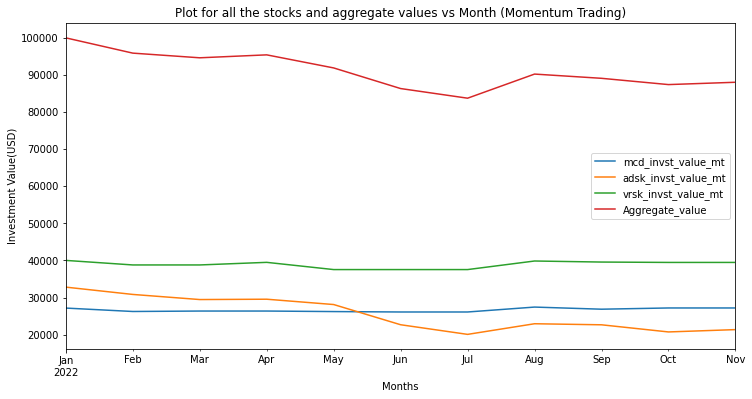

In [147]:
# Plotting the Stock value and Aggregate Value of the Investment at the beginning of each month (for Momentum Trading)
mt_data.plot(title='Plot for all the stocks and aggregate values vs Month (Momentum Trading)',xlabel='Months',ylabel='Investment Value(USD)',figsize=(12,6))
plt.show()

* We can see that the aggregate value and position value for Autodesk have decreased over the period, whereas Verisk and McDonald's stocks have only very slight changes in their position values towards the end.

## **Investing in S&P 500** 

In [148]:
# Creating a ticker for S&P 500
tickers_list = ['^GSPC']

# Pulling historical S&P Prices - Daily Prices (from December 31st 2021 to November 2nd 2022)
sp = {ticker : si.get_data(ticker,start_date = '12/31/2021',end_date='11/02/2022',interval='1mo') for ticker in tickers_list}

In [149]:
# Since we just need the Adjusted Closing Price for our analysis, we will extract 'adjclose' price from the data retrieved

# Creating an Empty DataFrame to store the data
SP500 = pd.DataFrame()

# Using all the Tickers to add data to the DataFrame created
for i in tickers_list[0:]:
  SP500[i] = pd.DataFrame(sp[i]['adjclose'])

In [150]:
# Renaming the Column to 'Price'
SP500=SP500.rename(columns={'^GSPC':'Price'})

In [151]:
SP500['PercDiff'] = SP500['Price'].pct_change()

In [152]:
# Adding a Column for the Investment Value
SP500['invst_value']=100000

In [154]:
# 'For' Loop to Calculate the Value of Each Position on a Particular Day (McDonald's)
for i in range(1,SP500.shape[0]):
  if i==1:
    SP500.iloc[i,2]=SP500.iloc[i-1,2] * (1+SP500.iloc[i,1]) 
  else:
    SP500.iloc[i,2]=SP500.iloc[i-1,2] * (1+SP500.iloc[i,1])

In [155]:
# Filling Null Values with 0
SP500=SP500.fillna(0)

In [ ]:
# Printing the shape of the DataFrame
SP500.shape

(11, 3)

In [157]:
# Printing the Last 5 rows of the DataFrame
SP500.tail()

Price  PercDiff   invst_value
2022-07-01  4130.290039  0.091116  91468.153773
2022-08-01  3955.000000 -0.042440  87586.233594
2022-09-01  3585.620117 -0.093396  79406.058449
2022-10-01  3871.979980  0.079863  85747.697356
2022-11-01  4080.110107  0.053753  90356.884187

### **Value of Investment at the Beginning of Each Month (Investing $100,000 in S&P Index)**

In [158]:
# Printing Value of Investment at the Beginning of Each Month (Investing $100,000 in S&P Index)
SP500

Price  PercDiff    invst_value
2022-01-01  4515.549805  0.000000  100000.000000
2022-02-01  4373.939941 -0.031360   96863.950805
2022-03-01  4530.410156  0.035773  100329.092850
2022-04-01  4131.930176 -0.087957   91504.475745
2022-05-01  4132.149902  0.000053   91509.341743
2022-06-01  3785.379883 -0.083920   83829.877790
2022-07-01  4130.290039  0.091116   91468.153773
2022-08-01  3955.000000 -0.042440   87586.233594
2022-09-01  3585.620117 -0.093396   79406.058449
2022-10-01  3871.979980  0.079863   85747.697356
2022-11-01  4080.110107  0.053753   90356.884187

* The value of the investment on November 1st 2022 (when invested in S&P 500) is **$90,356.**

* Hence, we can say that the Portfolio allocation using Buy and Hold strategy performed better than investing in S&P 500.

## **Comparing Three Strategies** 

In [159]:
# Creating an empty DataFrame to Store the Aggregate Value of Investment at the beginning of each month (for all 3 strategies)
investment_value=pd.DataFrame()

In [161]:
# Adding Variables for Storing Aggregate Values for all three strategies
investment_value['agg_value_buy_and_hold'] = prep_data_3['Aggregate_Value']
investment_value['agg_value_momentum_trading'] = mt_data['Aggregate_value']
investment_value['agg_value_S&P_500'] = SP500['invst_value']

In [162]:
# Printing the DataFrame
investment_value

agg_value_buy_and_hold  agg_value_momentum_trading  \
2022-01-01            99999.999350                99999.980892   
2022-02-01            90745.739643                95886.361564   
2022-03-01            97988.589668                94627.676048   
2022-04-01            92805.496206                95420.134215   
2022-05-01            89599.393598                91895.735803   
2022-06-01            83962.474848                86337.296095   
2022-07-01            95261.914306                83740.361179   
2022-08-01            91539.586231                90238.901985   
2022-09-01            84024.590460                89098.165089   
2022-10-01            94681.213656                87406.867543   
2022-11-01            93253.161049                88033.754769   

            agg_value_S&P_500  
2022-01-01      100000.000000  
2022-02-01       96863.950805  
2022-03-01      100329.092850  
2022-04-01       91504.475745  
2022-05-01       91509.341743  
2022-06-01       83829.877790  
2022-07-01       91468.153773  
2022-08-01       87586.233594  
2022-09-01       79406.058449  
2022-10-01       85747.697356  
2022-11-01       90356.884187

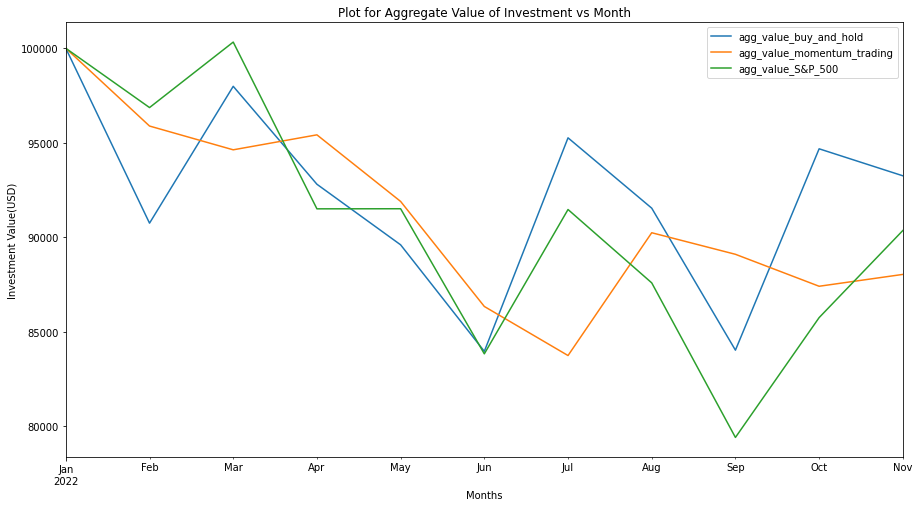

In [163]:
# Plotting the Aggregate Value of the Investment at the beginning of each month (for all 3 strategies)
investment_value.plot(title='Plot for Aggregate Value of Investment vs Month',xlabel='Months',ylabel='Investment Value(USD)',figsize=(15,8))
plt.show()

* For the Buy_and_Hold strategy, the Aggregate Value of the investment on November 1st 2022 was **$93,253.**

* For the Momentum Trading strategy, the Aggregate Value of the investment on November 1st 2022 was **$88,033.**

* If we invested in S&P 500 index, the Aggregate Value of the investment on November 1st 2022 was **$90,356.**

* Therefore, if we used the 'Buy & Hold Strategy' or the 'Momentum Trading Strategy' based on the chosen portfolio allocation, we would be losing money. If we invest in S&P 500 index, we would be losing about $10,000 approx.

* So we can conclude that Buy_and_Hold strategy helps to retain the maximum value for investment of the 3 strategies.

# **5) Conclusions**

* For the Portfolio Allocation Model, we have used binary constraints to ensure that we select one and only one stock from each sector.

* Decreasing the max limit for risk and reducing the step size gave us good results as the data collected is on a daily basis (for 5 years). Using the parameter analysis, the optimal risk was chosen, and was used for further analysis.

* We considered 5 different pairs of values of moving averages to determine the best Momentum Trading Strategy for each stock. The best strategy for each stock was decided based on the system return value for all the combinations.

* Based on the analysis for 2022, we got to know that 'Buy and Hold' strategy worked better for the chosen portfolio on the whole when compared to Momentum Trading strategy.

* Coming to the Individual stocks, for Verisk, the Momentum Trading Strategy worked better than Buy and Hold Strategy. For the other two stocks (McDonald's & Autodesk), Buy and Hold strategy worked better than Momentum Trading Strategy.

* During the course of this project, we got to learn more about various terms in the stock market and how a strategy could be used to an investor's advantage.

* Investment strategies play a vital role for investors; they can be goal-oriented and hence can help the investors make investment decisions based on their goals. The best investing strategies are the ones that have higher returns & lower risks. However, there is always a trade-off.

* The obtained strategy may vary on several factors, including but not limited to, one’s investment goals such as short term or long term, asset sector considered, the timeframe considered, and the risk ceiling considered. 